In [1]:
import pandas as pd;
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages



In [2]:
ls > lists.txt

In [3]:
zu = pd.read_csv("lists.txt",header=None, names=['Files'], sep='\t', lineterminator='\n')
all_files=[]
df = zu.reset_index()  
for index, row in df.iterrows():
  if row["Files"] not in all_files:
    all_files.append(row["Files"])


In [18]:
file_ids=[]
p = pd.read_csv("changepoint.tab", sep='\t', lineterminator='\n')
p=p.drop(['impact_scalar','comment'],axis=1)
change = {}
df = p.reset_index()  
for index, row in df.iterrows():
  if row['file_id'] not in change:
    change[row['file_id']] = [(row['timestamp'])]
  else:
    change[row['file_id']].append(row['timestamp'])

In [19]:
print(change)

{'M0100054L': [138.0], 'M0100054S': [171.0, 350.0], 'M0100054Z': [189.0, 234.0], 'M0100055J': [576.0], 'M010005DJ': [842.0], 'M010005FS': [660.0], 'M010005G2': [71.0], 'M010005GC': [750.0], 'M010005GO': [1166.0], 'M010005NF': [785.0, 925.0], 'M010006KW': [54.0], 'M010006RQ': [131.0], 'M010006YT': [96.0], 'M010006ZL': [100.0, 319.0], 'M010006ZX': [630.0], 'M01000721': [286.0], 'M010007RK': [348.0], 'M010007RX': [287.0], 'M010007SY': [142.0, 357.0], 'M010007TU': [192.0], 'M010007UV': [177.0], 'M010007VV': [152.0, 191.0], 'M010007WC': [301.0], 'M010007WJ': [104.0], 'M010007X3': [125.0], 'M010007XB': [298.0], 'M010007Y7': [302.0], 'M0100082W': [338.0], 'M0100082Z': [174.0], 'M0100084L': [97.0], 'M0100085G': [333.0], 'M0100085K': [203.0, 292.0], 'M0100085W': [220.0], 'M0100089S': [263.0], 'M010008AD': [160.0], 'M010008AV': [140.0, 62.0], 'M010008CL': [333.0], 'M010008CV': [326.0], 'M010008DH': [266.0], 'M010008DV': [46.0], 'M010008E0': [195.0], 'M010008FC': [240.0], 'M010008G5': [63.0], 'M0

In [5]:
filemine=[]
seg = pd.read_csv("segments.tab", sep='\t', lineterminator='\n')
file2seg = {}
df = seg.reset_index()  
for index, row in df.iterrows():
  if row['file_id']+'.tab' in all_files:
    filemine.append(row['file_id']+'.tab')
  if (row['file_id']) not in file2seg:
    file2seg[row['file_id']] = [(row['segment_id'])]
  else:
    file2seg[row['file_id']].append(row['segment_id'])

In [6]:

norms = {}
for filename in filemine:
  normsf = pd.read_csv(filename, sep='\t', lineterminator='\n')
  df = normsf.reset_index()  
  for index, row in df.iterrows():
    if(row['status']!='EMPTY_NA'):
      if row['file_id'] not in norms:
        norms[row['file_id']] = [[row['start'],row['end']]]
      elif [row['start'],row['end']] not in norms[row['file_id']]:
        norms[row['file_id']].append([row['start'],row['end']])

KeyboardInterrupt: ignored

In [ ]:
import math
import numpy as np

dic ={}
l=0

for key in change:
  for change_time in change[key]:
    if key in norms:
      l=l+1
      mini=10000
      for seg in norms[key]:
        val = seg[0]-change_time
        end = seg[1]-change_time
        if abs(end)<abs(val):
          val=end
        if abs(val)<abs(mini):
          mini=val
      p =int(math.floor(val/10)*10)
      if p in dic:
        dic[p]+=1
      else:
        dic[p]=1

print(l)
print(dic)
x=list(dic.keys())
fig,ax = plt.subplots(figsize=(16,10))
ax.bar(x,list(dic.values()),width=10)
plt.show()
      


  

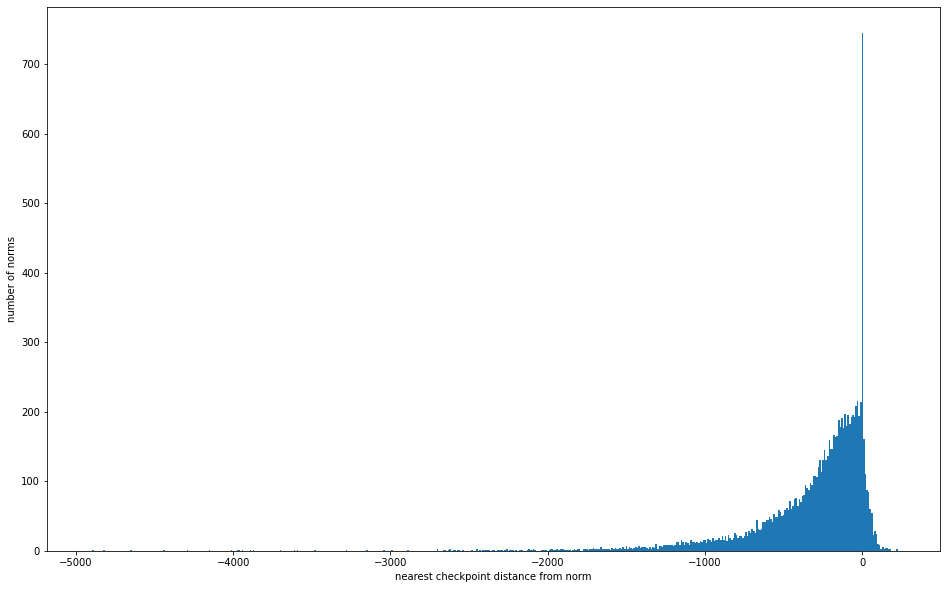

In [9]:

import math
import numpy as np

dic={}
  
for key in norms:
  full=[]
  dist=[]
  ba=[]
  for nm in norms[key]:
    a=nm[0]
    b=nm[1]
    mid=(a+b)/2
    full.append((mid,b-mid,'n'))
  if key in change:
    for cp in change[key]:
      full.append((cp,'c'))
  full.sort(key=lambda a: a[0])
  cp = -1
  for  item in full:
    if(len(item)==2):
      cp=item[0]
    else:
      if cp==-1:
        dist.append(-1)
        ba.append('b')
      elif(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
        dist.append(0)
        ba.append('b')
      else:
        dist.append(abs(item[0]-item[1]-cp))
        ba.append('b')

  cp = -1
  i=len(dist)
  for item in full[::-1]:
    if(len(item)==2):
      cp=item[0]
    else:
      i-=1
      if cp!=-1:
        if(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
          dist[i]=0
        else:
          dist[i]=min(dist[i],abs(cp-item[0]-item[1]))
          ba[i]='a'
      

  for i in range(0,len(dist)):
    val=dist[i]
    if val!=-1:
      p =int(math.floor(val/10)*10)
      if ba[i]=='b':
        p=-p
      if p in dic:
        dic[p]+=1
      else:
        dic[p]=0

x=list(dic.keys())
fig,ax = plt.subplots(figsize=(16,10))
ax.bar(x,list(dic.values()),width=10)
plt.xlabel("nearest checkpoint distance from norm")
plt.ylabel("number of norms")

plt.show()




  
#   traverse from right to left update dist
#   traverse from left to right update dist
#   then traverse list again store dist in bucket

# plot bucket


In [10]:
from matplotlib.widgets import RectangleSelector

import math
import numpy as np

dval =[]
rec=[]
prec=[]
f1=[]

for d in range(30):  
  dval.append(d)
  fpf=0
  tpf=0
  fnf=0
  for key in norms:
    fp=0
    tp=0
    fn=0
    changepoint =[ ]
    if key in change:
      changepoint = change[key]
    for nm in norms[key]:
      a=nm[0]
      b=nm[1]
      for p in range(math.ceil(a-d),math.floor(b+d)):
        if(p in changepoint):
          tp+=1
        else:
          fp+=1
    fn += len(changepoint)-tp
    fpf+=fp
    tpf+=tp
    fnf+=fn
    
      
  recall = tpf/(tpf+fnf)
  precision = tpf/(tpf+fpf)
  f1val=2*precision*recall/(precision+recall)
  f1.append(f1val*100)
  rec.append(recall)
  prec.append(precision*100)


print(rec)
print(prec)
print(f1)
plt.plot(dval,prec,label='precision*100')
plt.plot(dval,rec,label='recall')
plt.plot(dval,f1,label='f1*100')
plt.legend()
plt.show()



  



  

KeyboardInterrupt: ignored

In [11]:
file = pd.read_csv("file_info.tab", sep='\t', lineterminator='\n')
file_dict={}
file_types=[]
df = file.reset_index()  
for index, row in df.iterrows():
  file_dict[row["file_uid"]]=row["data_type"]
  if row["data_type"] not in file_types:
    file_types.append(row["data_type"])



In [12]:
file_types.remove(".ltf.xml")

.flac.ldcc


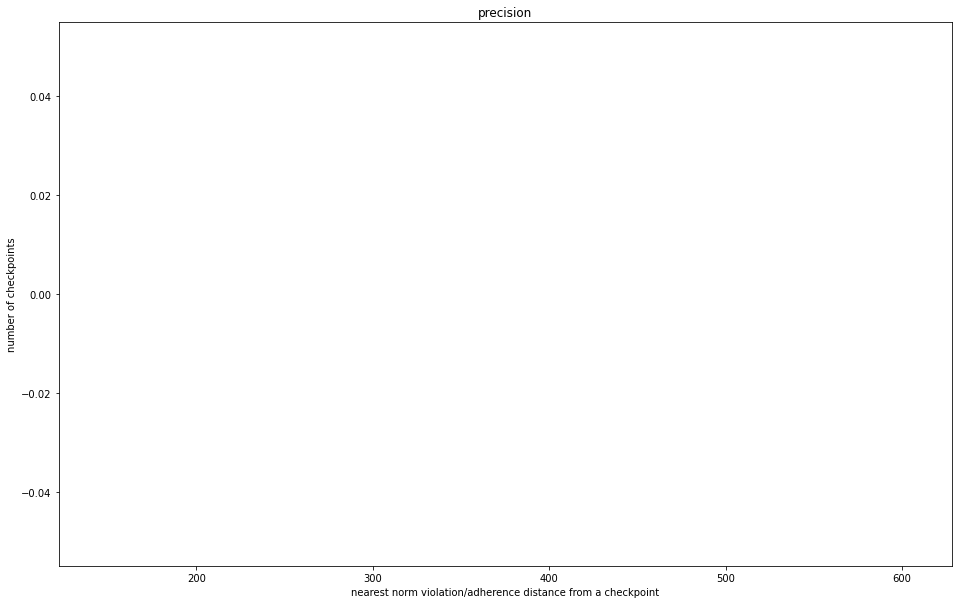

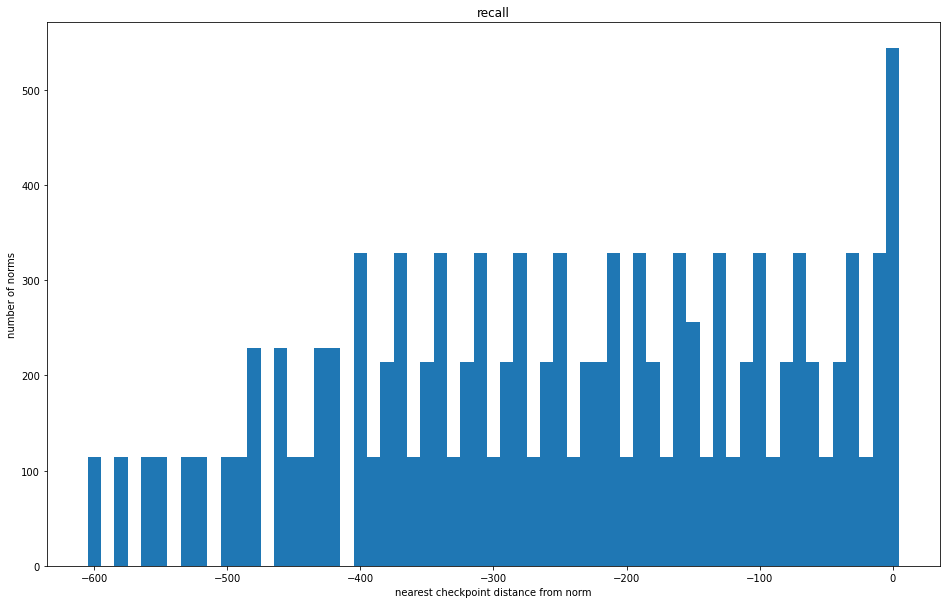

.psm.xml


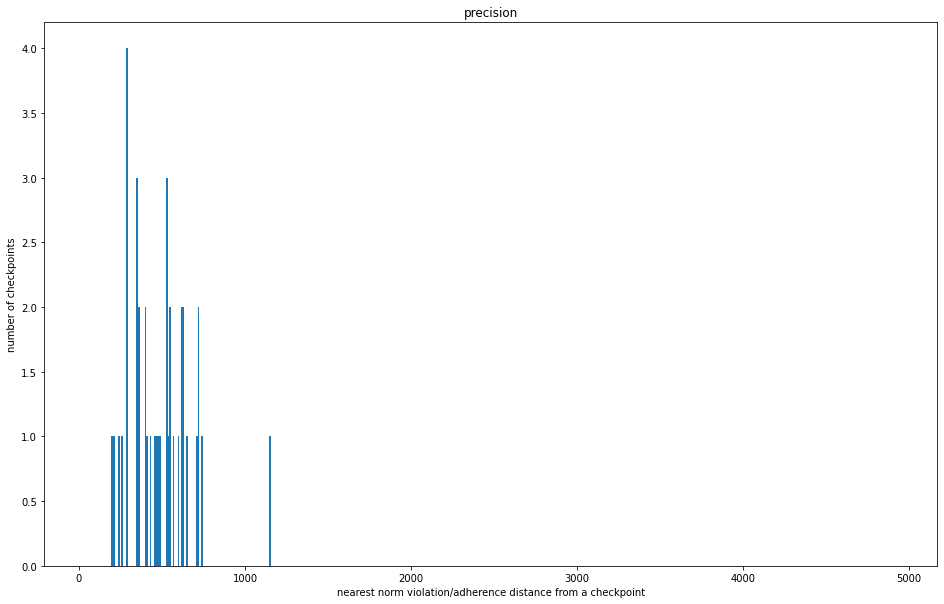

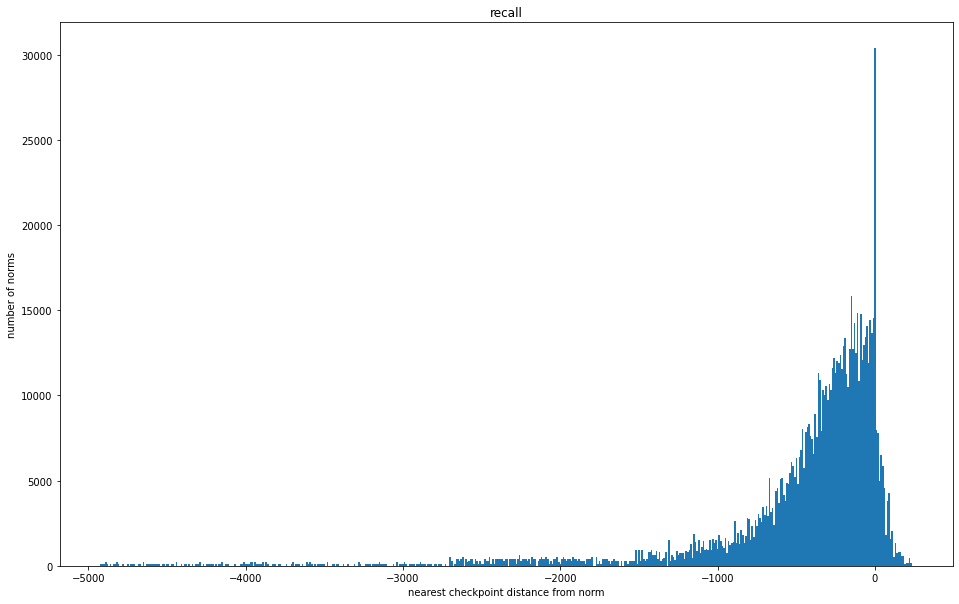

.mp4.ldcc


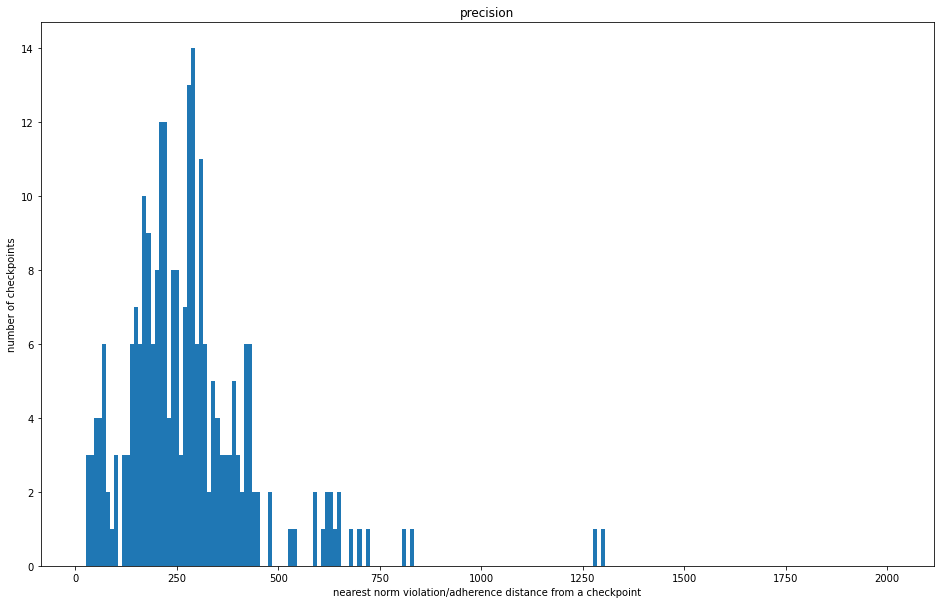

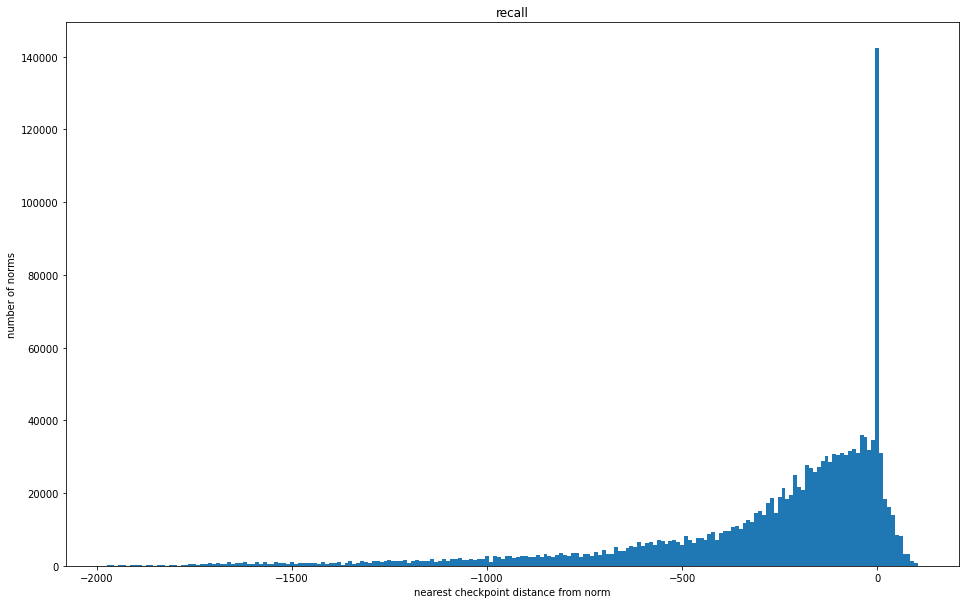

In [13]:
for file_type in file_types:
  p = pd.read_csv("changepoint.tab", sep='\t', lineterminator='\n')
  p=p.drop(['impact_scalar','comment'],axis=1)
  change = {}
  df = p.reset_index()  
  for index, row in df.iterrows():
    if file_dict[row['file_id']]==file_type:
      if row['file_id'] not in change:
        change[row['file_id']] = [(row['timestamp'])]
      else:
        change[row['file_id']].append(row['timestamp'])
      
  
  
  norms = {}
  for filename in filemine:
    normsf = pd.read_csv(filename, sep='\t', lineterminator='\n')
    df = normsf.reset_index()  
    for index, row in df.iterrows():
      if(row['status']!='EMPTY_NA'):
        if file_dict[row['file_id']]==file_type:
          if row['file_id'] not in norms:
            norms[row['file_id']] = [[row['start'],row['end']]]
          else:
            norms[row['file_id']].append([row['start'],row['end']])


  dic ={}
  for key in change:
    for change_time in change[key]:
      if key in norms:
        mini=1000
        for seg in norms[key]:
          val = seg[0]-change_time
          end = seg[1]-change_time
          if abs(end)<abs(val):
            val=end
          if abs(val)<abs(mini):
            mini=val
        p =int(math.floor(val/10)*10)
        if p in dic:
          dic[p]+=1
        else:
          dic[p]=0
  print(file_type)
  x=list(dic.keys())
  fig,ax = plt.subplots(figsize=(16,10))
  ax.bar(x,list(dic.values()),width=10)
  plt.title('recall')
  plt.xlabel("nearest norm violation/adherence distance from a checkpoint")
  plt.ylabel("number of checkpoints")
  plt.show()


  dic={}
    
  for key in norms:
    full=[]
    dist=[]
    ba=[]
    for nm in norms[key]:
      a=nm[0]
      b=nm[1]
      mid=(a+b)/2
      full.append((mid,b-mid,'n'))
    if key in change:
      for cp in change[key]:
        full.append((cp,'c'))
    full.sort(key=lambda a: a[0])
    cp = -1
    for  item in full:
      if(len(item)==2):
        cp=item[0]
      else:
        if cp==-1:
          dist.append(-1)
          ba.append('b')
        elif(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
          dist.append(0)
          ba.append('b')
        else:
          dist.append(abs(item[0]-item[1]-cp))
          ba.append('b')

    cp = -1
    i=len(dist)
    for item in full[::-1]:
      if(len(item)==2):
        cp=item[0]
      else:
        i-=1
        if cp!=-1:
          if(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
            dist[i]=0
          else:
            dist[i]=min(dist[i],abs(cp-item[0]-item[1]))
            ba[i]='a'
        

    for i in range(0,len(dist)):
      val=dist[i]
      if val!=-1:
        p =int(math.floor(val/10)*10)
        if ba[i]=='b':
          p=-p
        if p in dic:
          dic[p]+=1
        else:
          dic[p]=0

  x=list(dic.keys())
  fig,ax = plt.subplots(figsize=(16,10))
  ax.bar(x,list(dic.values()),width=10)
  plt.xlabel("nearest checkpoint distance from norm")
  plt.ylabel("number of norms")
  plt.title("precision")
  plt.show()






.mp4.ldcc


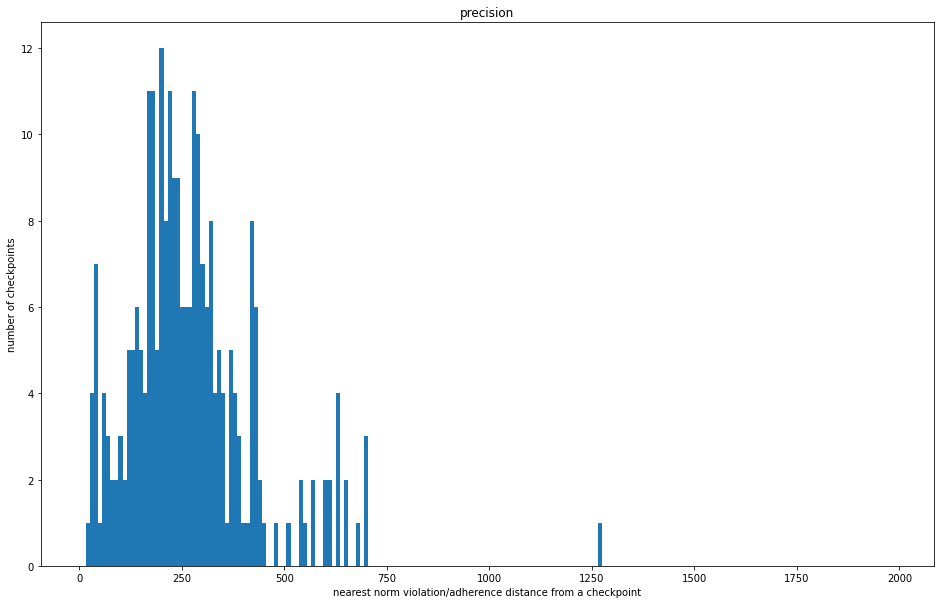

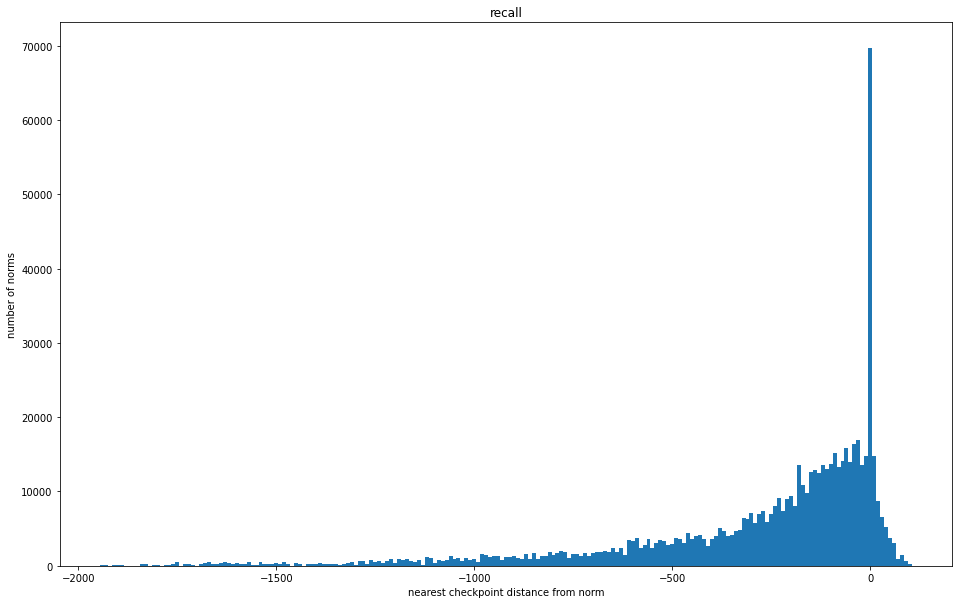

.mp4.ldcc


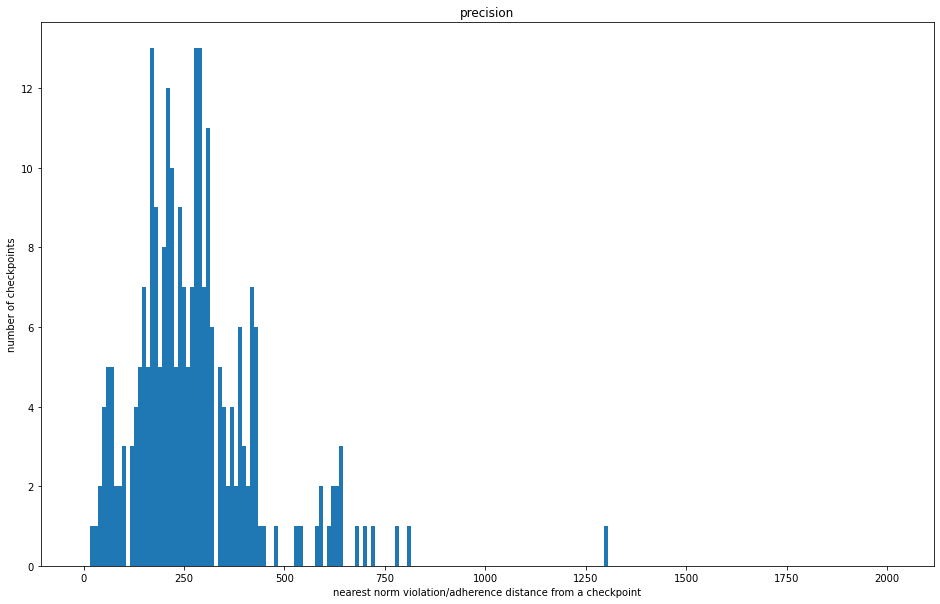

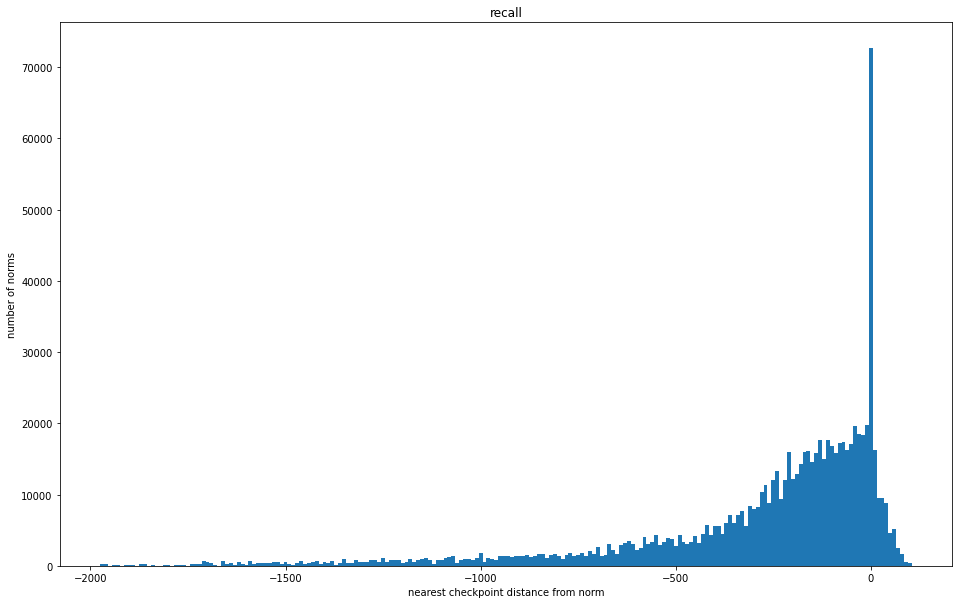

In [14]:
for status in ['adhere','violate']:
  p = pd.read_csv("changepoint.tab", sep='\t', lineterminator='\n')
  p=p.drop(['impact_scalar','comment'],axis=1)
  change = {}
  df = p.reset_index()  
  for index, row in df.iterrows():
    if file_dict[row['file_id']]==file_type:
      if row['file_id'] not in change:
        change[row['file_id']] = [(row['timestamp'])]
      else:
        change[row['file_id']].append(row['timestamp'])
      
  
  
  norms = {}
  for filename in filemine:
    normsf = pd.read_csv(filename, sep='\t', lineterminator='\n')
    df = normsf.reset_index()  
    for index, row in df.iterrows():
      if(row['status']!=status):
        if row['file_id'] not in norms:
          norms[row['file_id']] = [[row['start'],row['end']]]
        else:
          norms[row['file_id']].append([row['start'],row['end']])


  dic ={}
  for key in change:
    for change_time in change[key]:
      if key in norms:
        mini=1000
        for seg in norms[key]:
          val = seg[0]-change_time
          end = seg[1]-change_time
          if abs(end)<abs(val):
            val=end
          if abs(val)<abs(mini):
            mini=val
        p =int(math.floor(val/10)*10)
        if p in dic:
          dic[p]+=1
        else:
          dic[p]=0
  print(file_type)
  x=list(dic.keys())
  fig,ax = plt.subplots(figsize=(16,10))
  ax.bar(x,list(dic.values()),width=10)
  plt.title('recall')
  plt.xlabel("nearest norm violation/adherence distance from a checkpoint")
  plt.ylabel("number of checkpoints")
  plt.show()


  dic={}
    
  for key in norms:
    full=[]
    dist=[]
    ba=[]
    for nm in norms[key]:
      a=nm[0]
      b=nm[1]
      mid=(a+b)/2
      full.append((mid,b-mid,'n'))
    if key in change:
      for cp in change[key]:
        full.append((cp,'c'))
    full.sort(key=lambda a: a[0])
    cp = -1
    for  item in full:
      if(len(item)==2):
        cp=item[0]
      else:
        if cp==-1:
          dist.append(-1)
          ba.append('b')
        elif(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
          dist.append(0)
          ba.append('b')
        else:
          dist.append(abs(item[0]-item[1]-cp))
          ba.append('b')

    cp = -1
    i=len(dist)
    for item in full[::-1]:
      if(len(item)==2):
        cp=item[0]
      else:
        i-=1
        if cp!=-1:
          if(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
            dist[i]=0
          else:
            dist[i]=min(dist[i],abs(cp-item[0]-item[1]))
            ba[i]='a'
        

    for i in range(0,len(dist)):
      val=dist[i]
      if val!=-1:
        p =int(math.floor(val/10)*10)
        if ba[i]=='b':
          p=-p
        if p in dic:
          dic[p]+=1
        else:
          dic[p]=0

  x=list(dic.keys())
  fig,ax = plt.subplots(figsize=(16,10))
  ax.bar(x,list(dic.values()),width=10)
  plt.xlabel("nearest checkpoint distance from norm")
  plt.ylabel("number of norms")
  plt.title("precision")
  plt.show()






In [8]:
norm_types = [] 

for filename in filemine:
  normsf = pd.read_csv(filename, sep='\t', lineterminator='\n')
  df = normsf.reset_index()  
  for index, row in df.iterrows():
    if row["norm"] not in norm_types:
      norm_types.append(row["norm"])

In [9]:
norm_types

[105,
 201,
 103,
 102,
 104,
 202,
 487,
 203,
 488,
 489,
 490,
 230,
 204,
 274,
 491,
 226,
 492,
 493,
 239,
 429,
 494,
 495,
 496,
 497,
 498,
 499,
 205,
 218,
 1635,
 1636,
 1637,
 1638,
 1639,
 1255,
 1640,
 1641,
 1642,
 1643,
 1644,
 1645,
 1646,
 1647,
 267,
 809,
 820,
 1648,
 1649,
 1650,
 1754,
 1755,
 1756,
 1757,
 1758,
 1759,
 468,
 1760,
 1761,
 1762,
 1763,
 1764,
 1765,
 1084,
 1766,
 1767,
 1768,
 2820,
 208,
 2821,
 435,
 342,
 730,
 542,
 216,
 2822,
 705,
 2823,
 439,
 2824,
 2825,
 2826,
 2827,
 398,
 2828,
 597,
 2829,
 3226,
 3227,
 327,
 227,
 3078,
 3228,
 2196,
 3229,
 3230,
 3231,
 3232,
 3233,
 741,
 987,
 213,
 3234,
 399,
 3235,
 3236,
 3237,
 3238,
 594,
 3239,
 3240,
 3241,
 3242,
 3243,
 3244,
 3245,
 3246,
 1992,
 3247,
 637,
 3248,
 3249,
 3250,
 3251,
 3252,
 3253,
 3254,
 3255,
 3256,
 3257,
 3258,
 3259,
 3260,
 3261,
 3262,
 3263,
 4040,
 4041,
 4042,
 4043,
 4044,
 2164,
 4045,
 324,
 4046,
 4047,
 4048,
 2700,
 4049,
 4050,
 4051,
 4052,
 

105


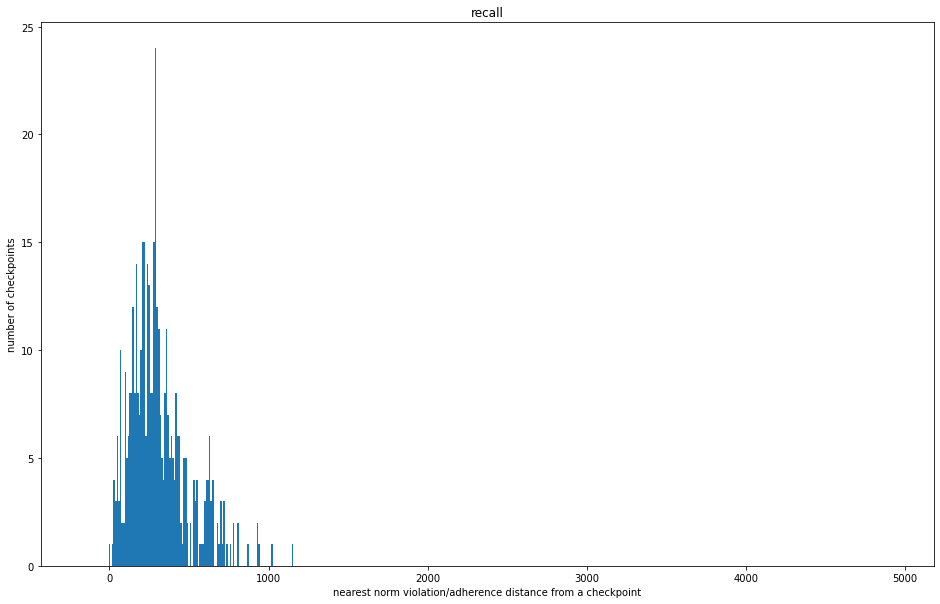

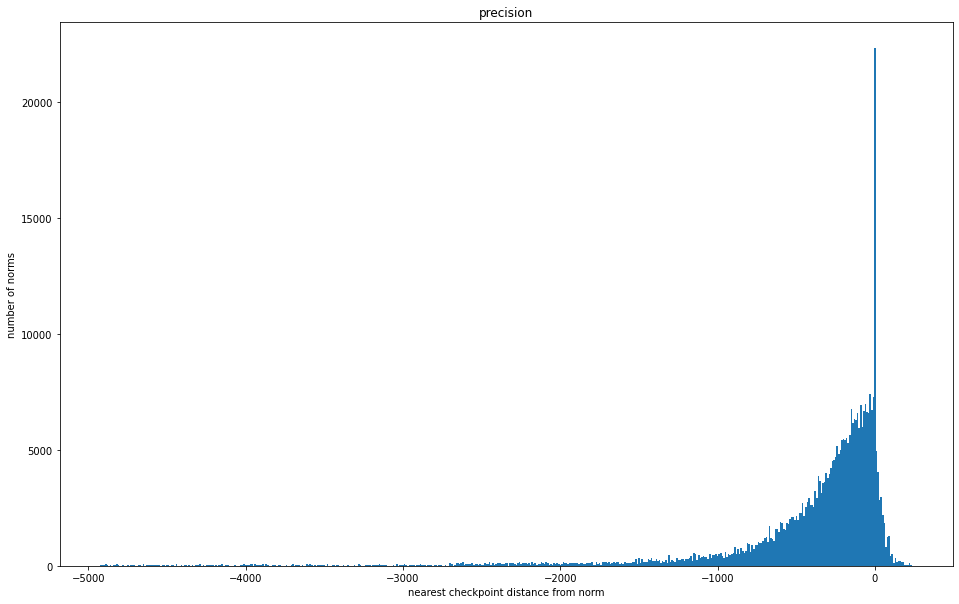

201


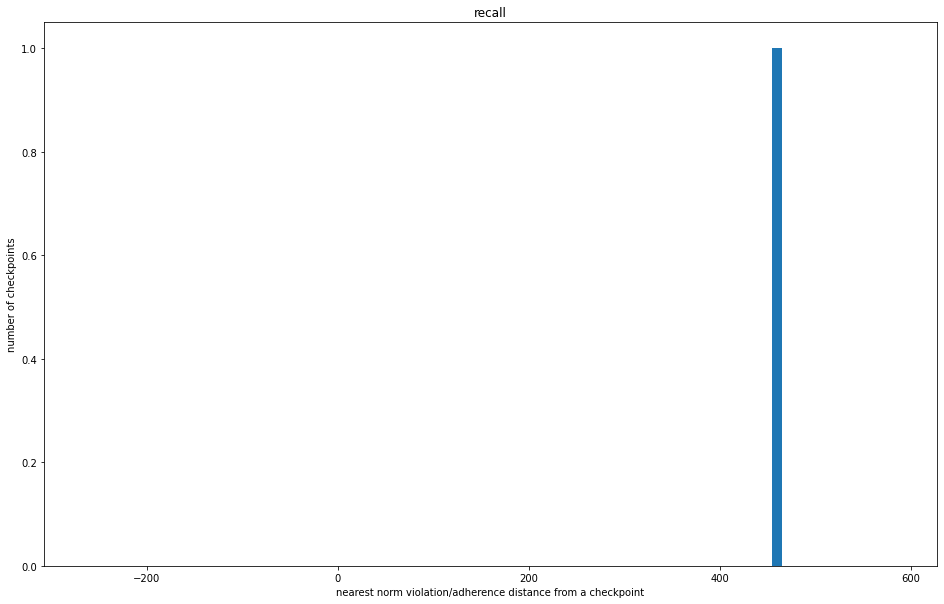

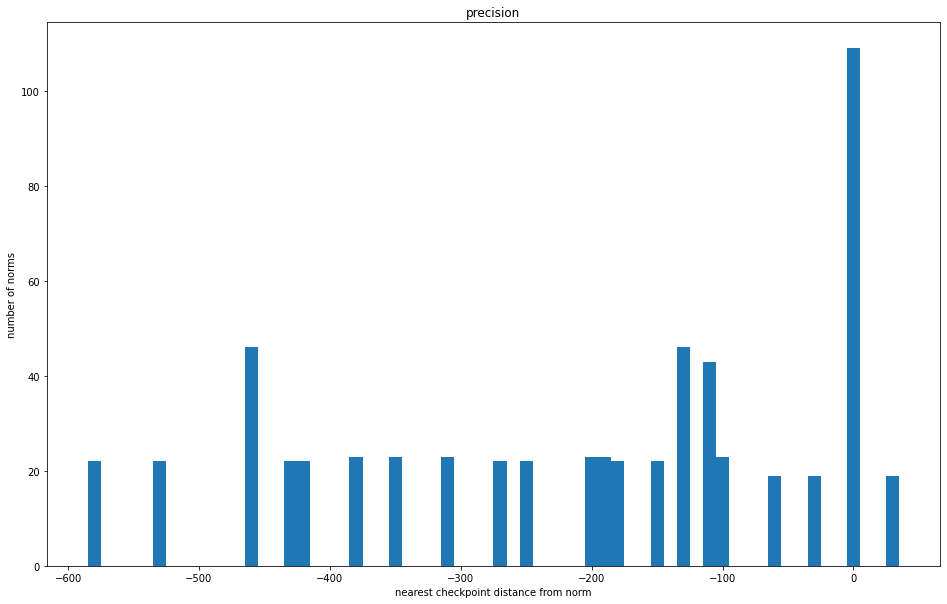

103


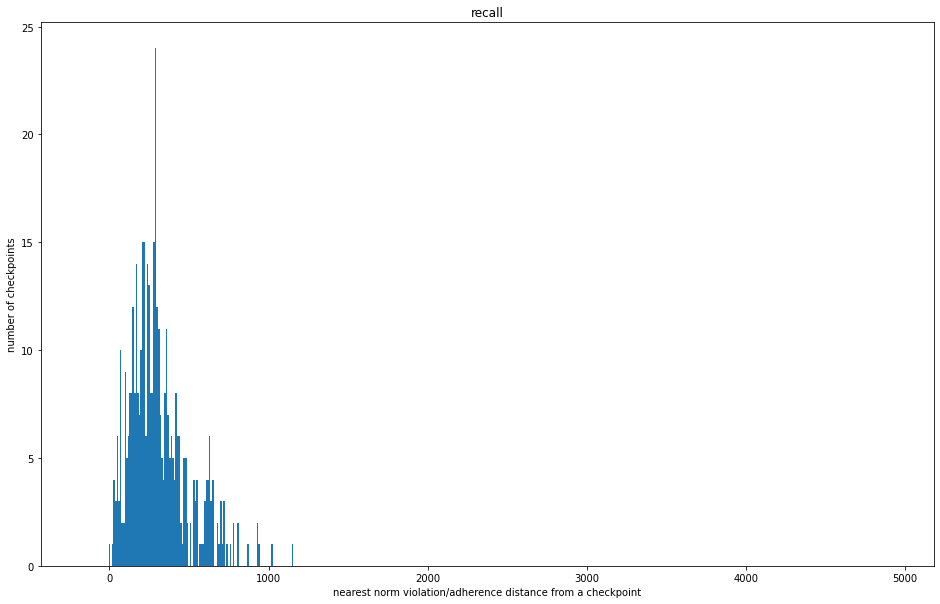

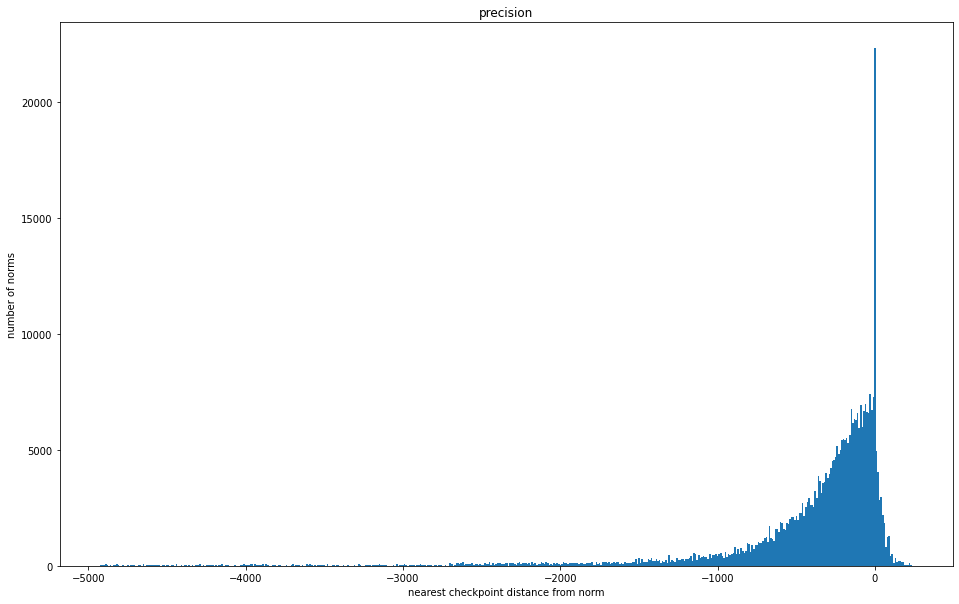

102


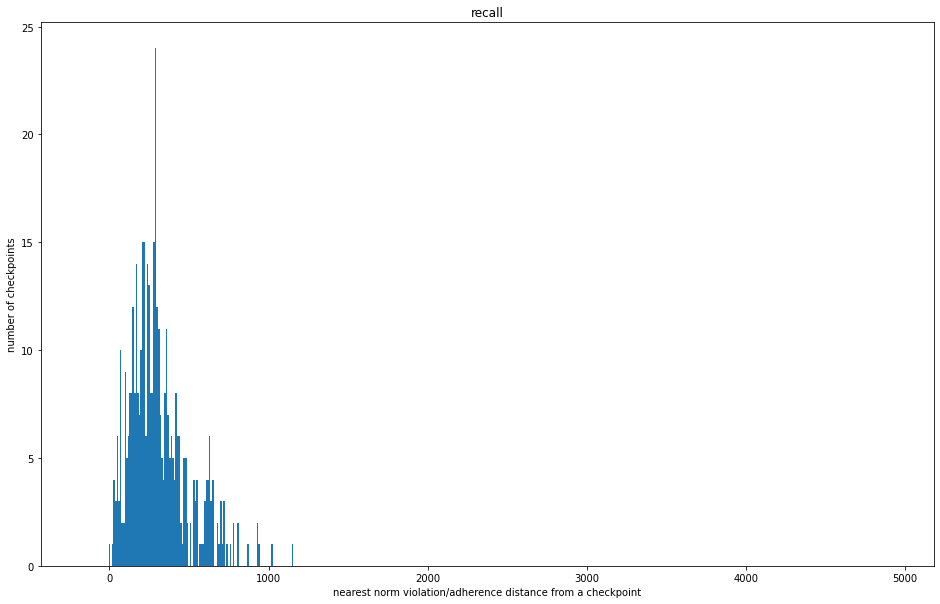

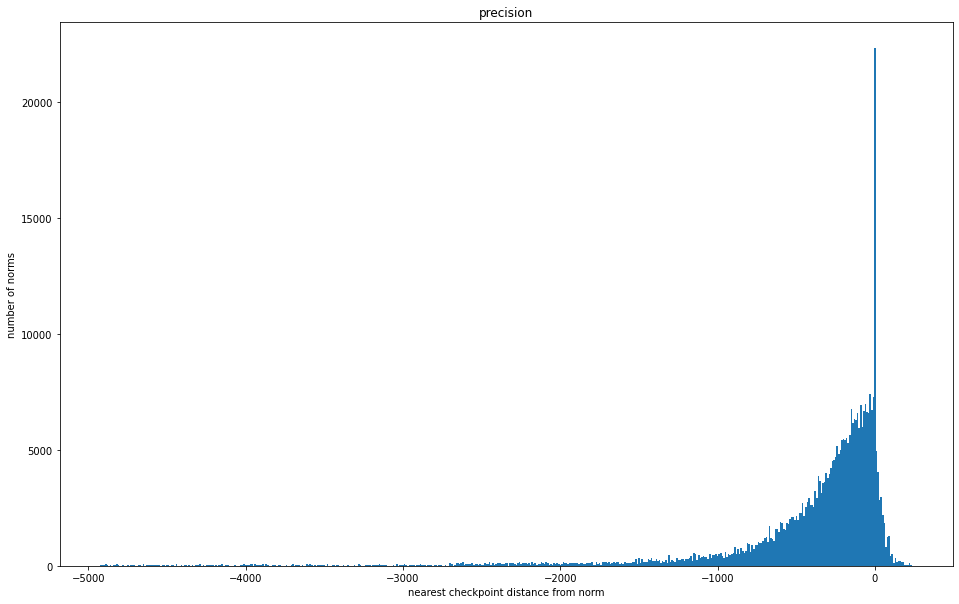

104


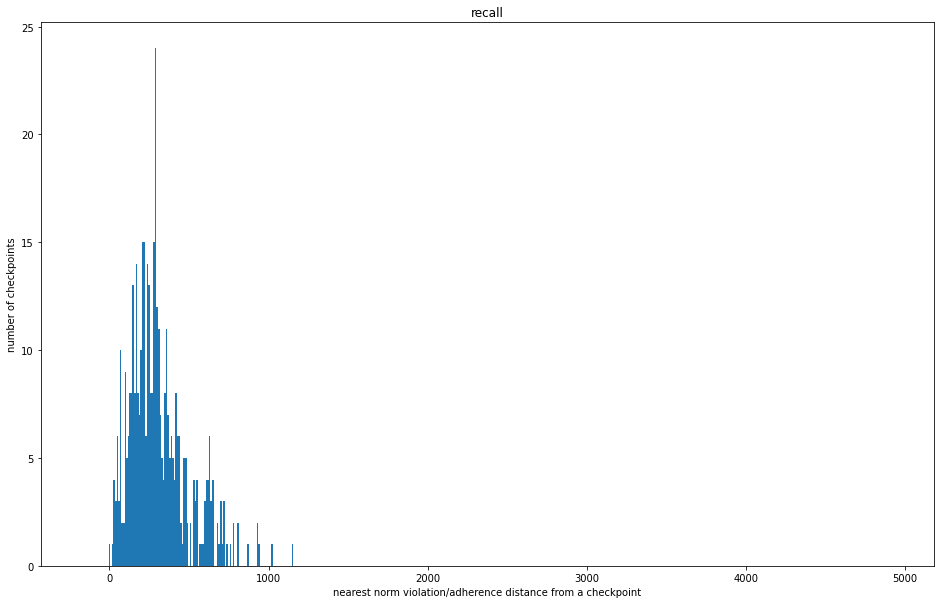

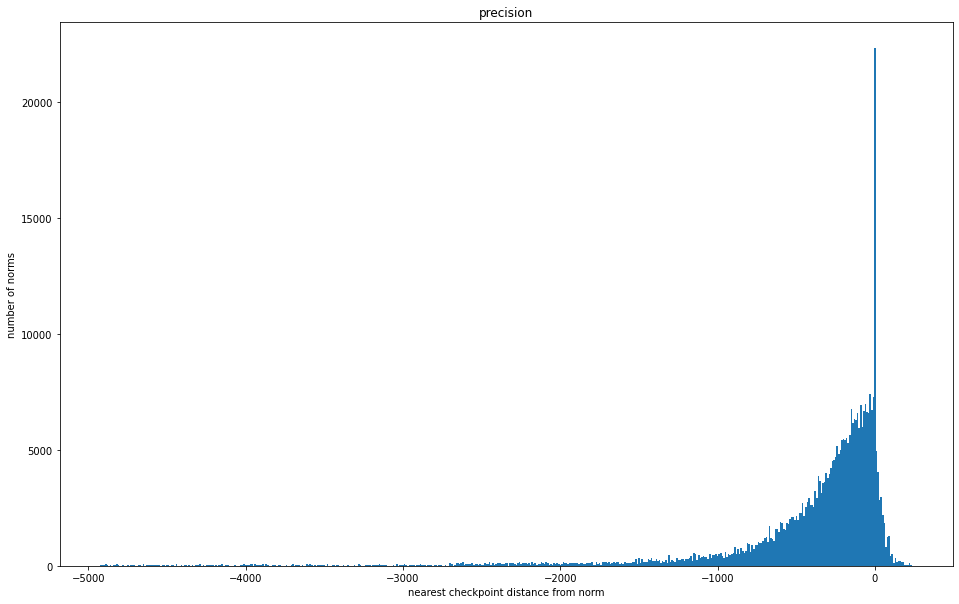

202


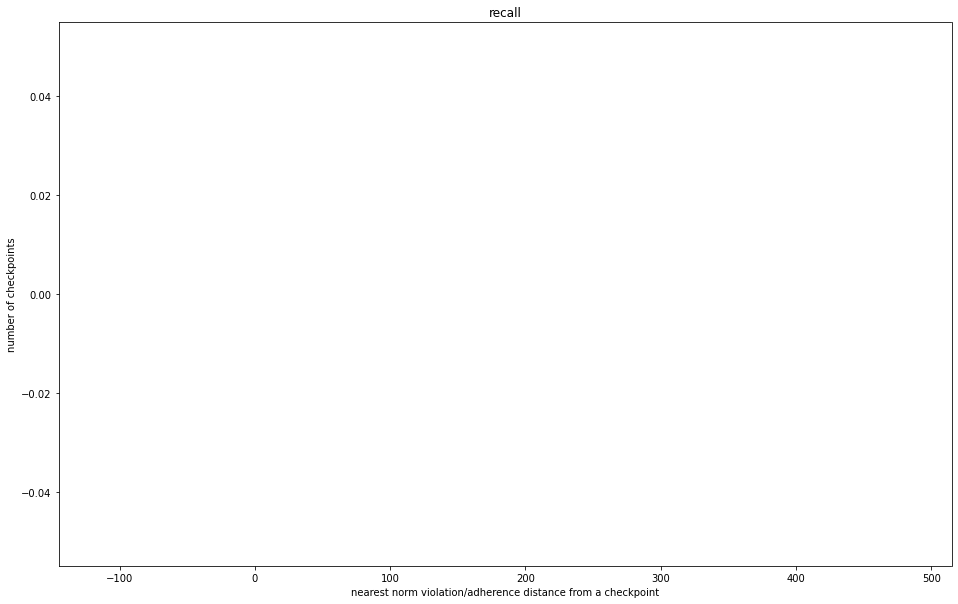

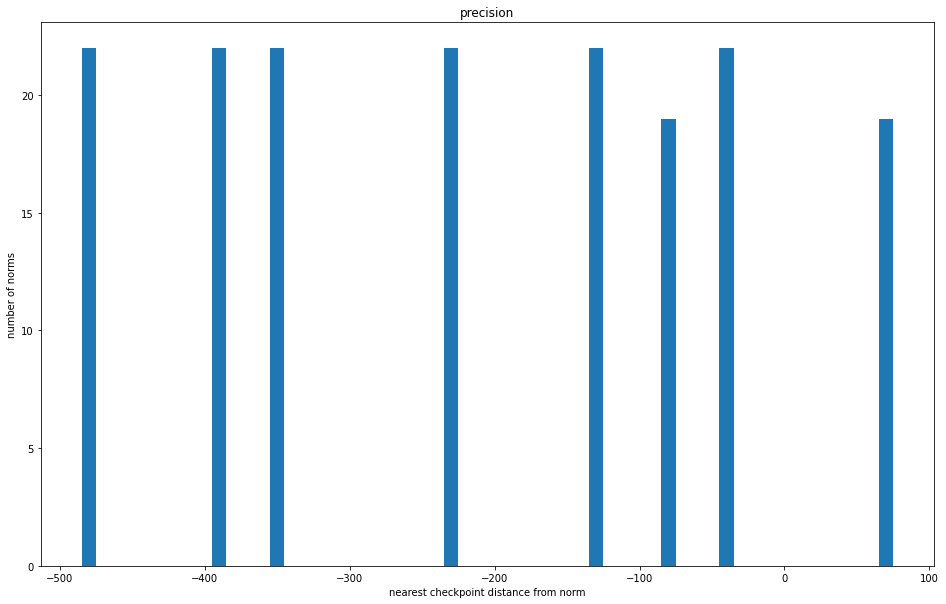

487


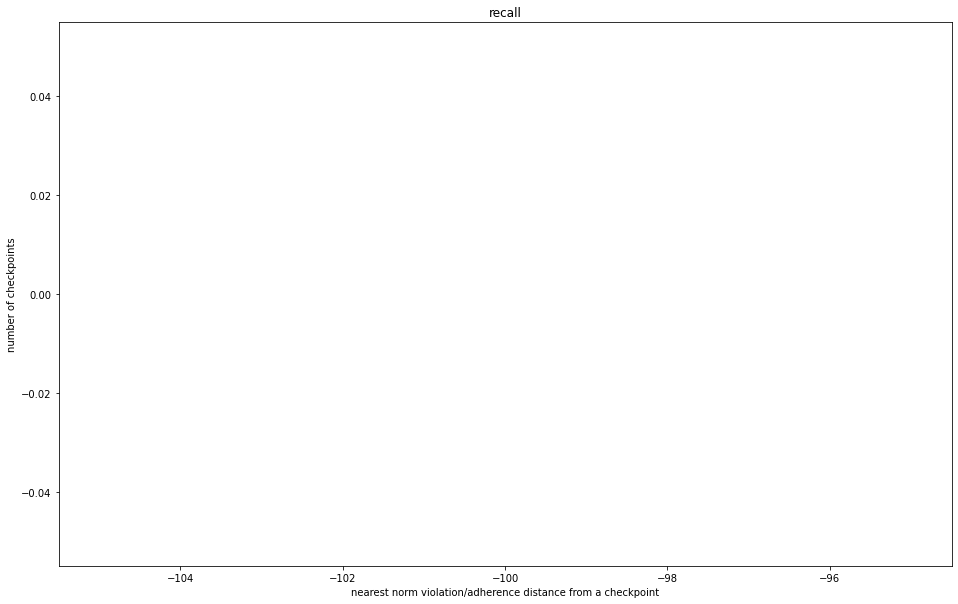

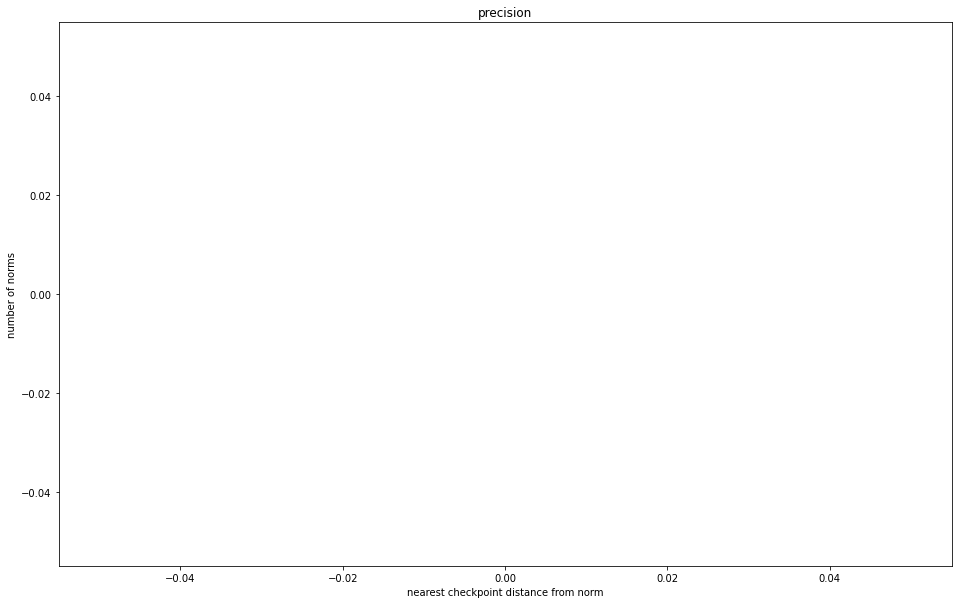

203


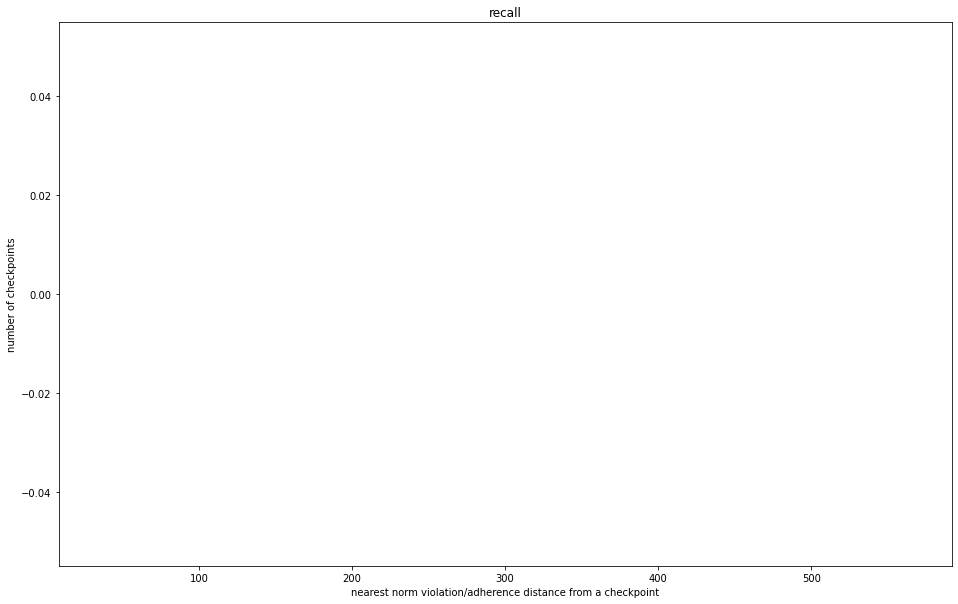

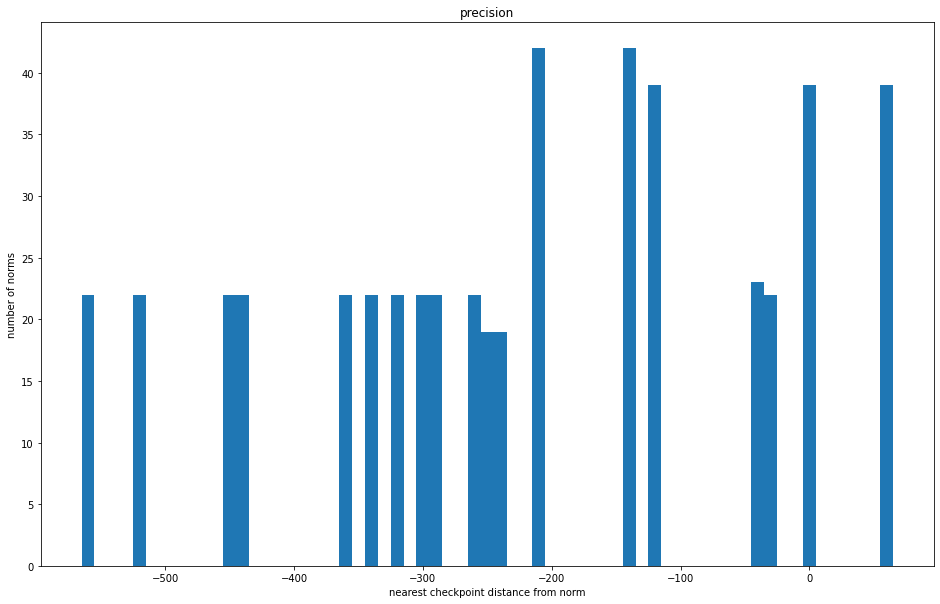

488


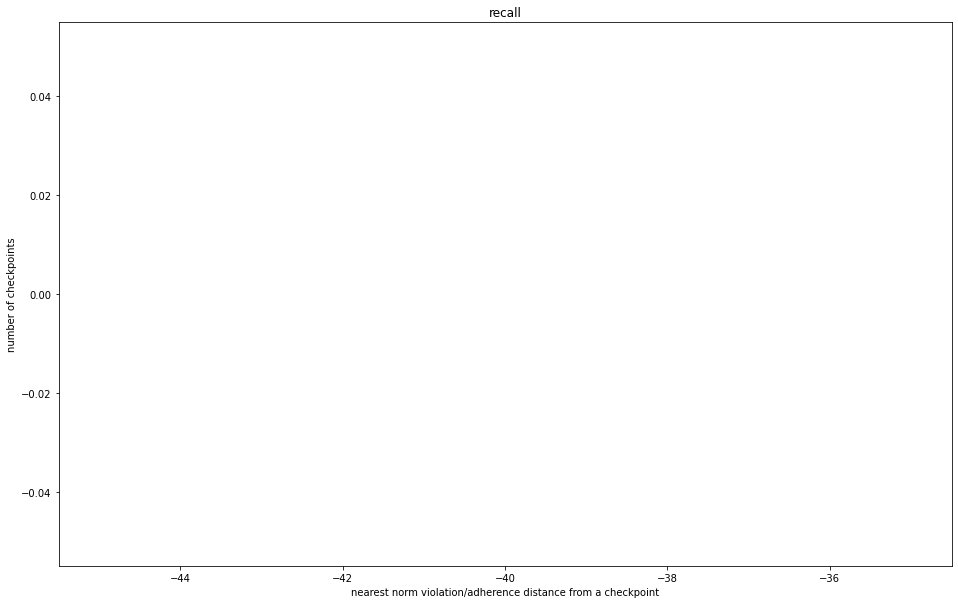

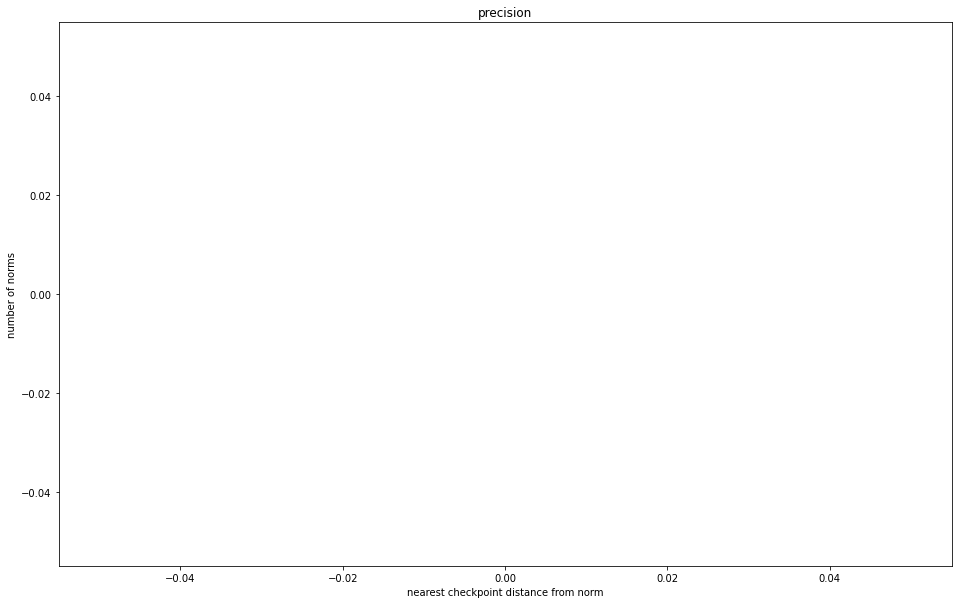

489


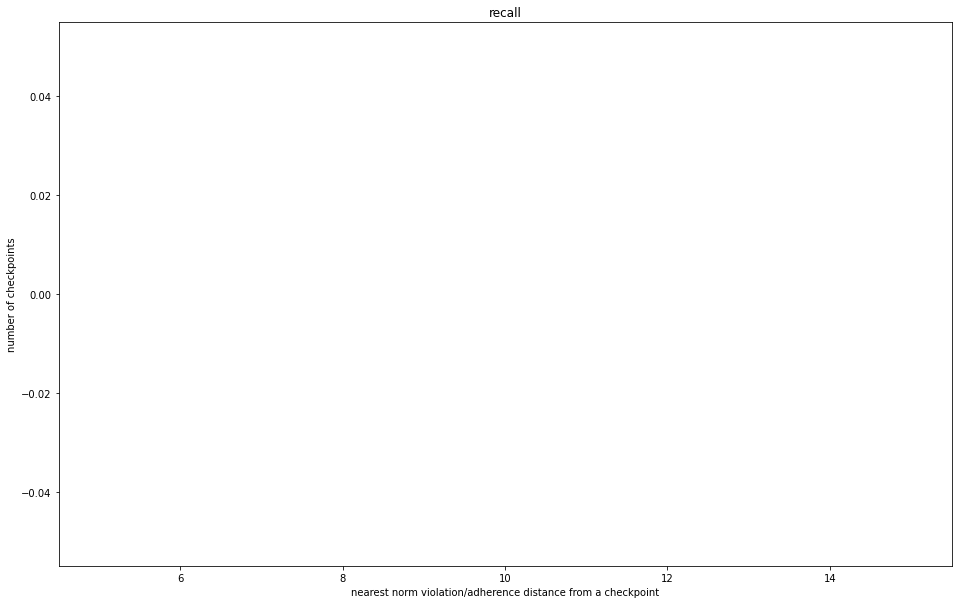

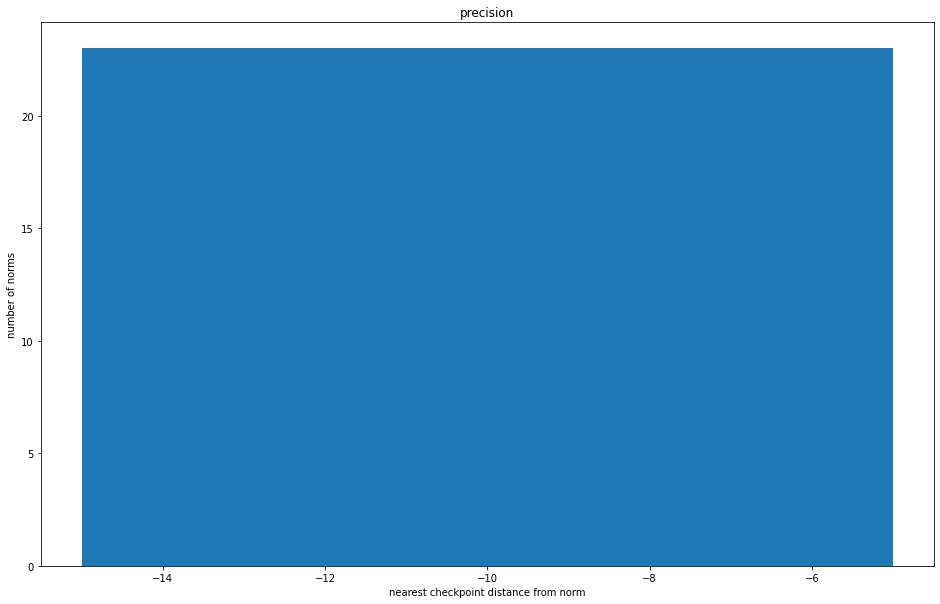

490


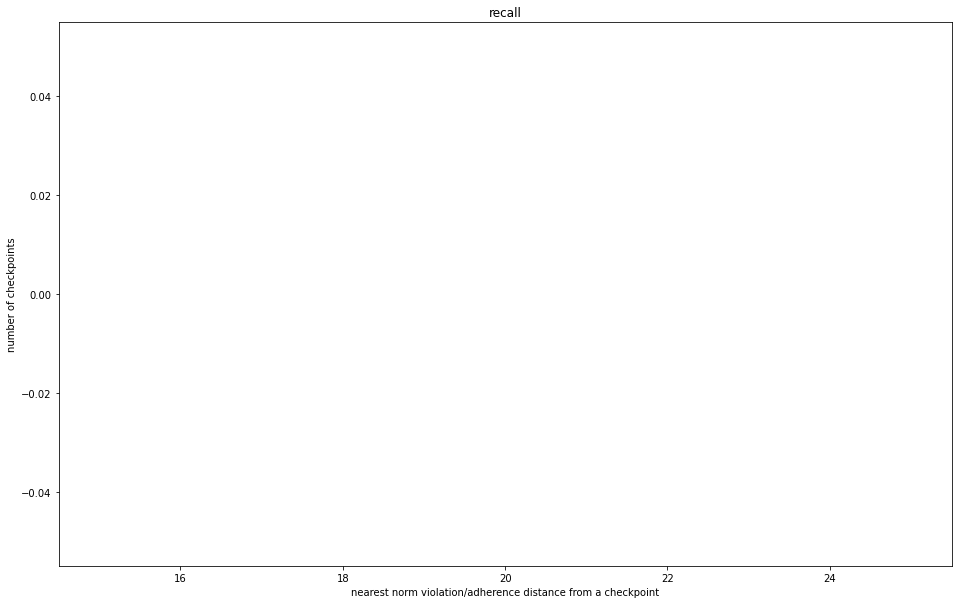

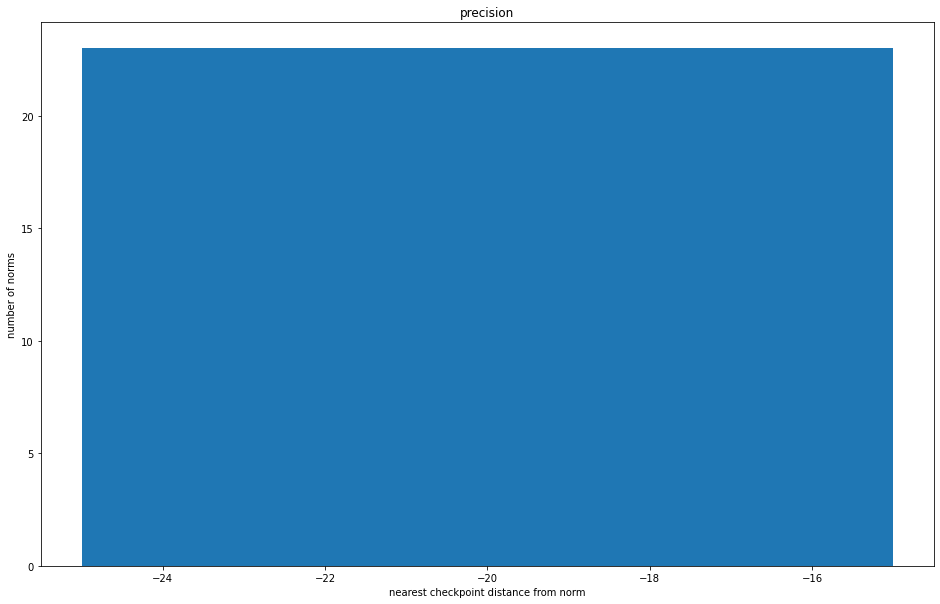

230


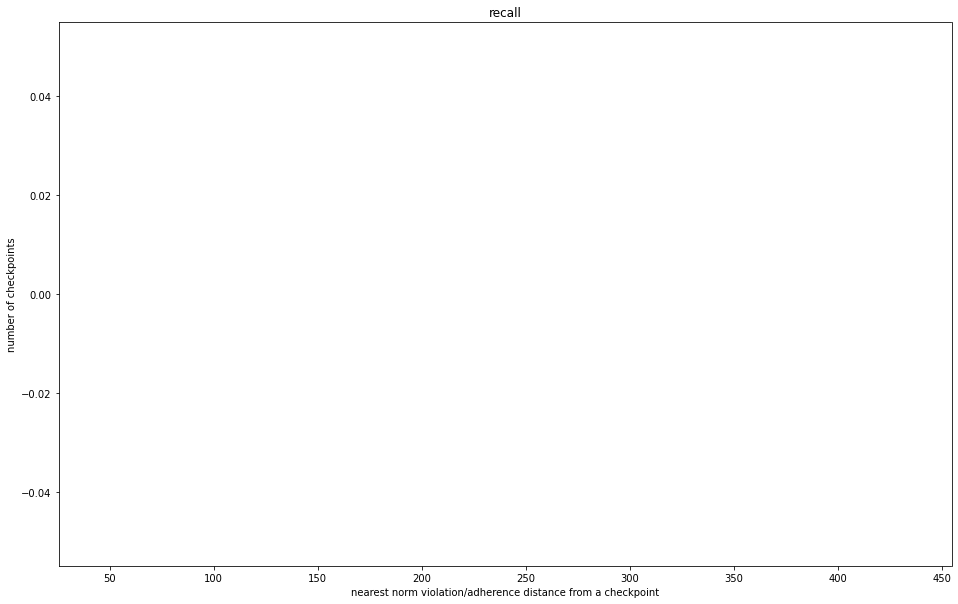

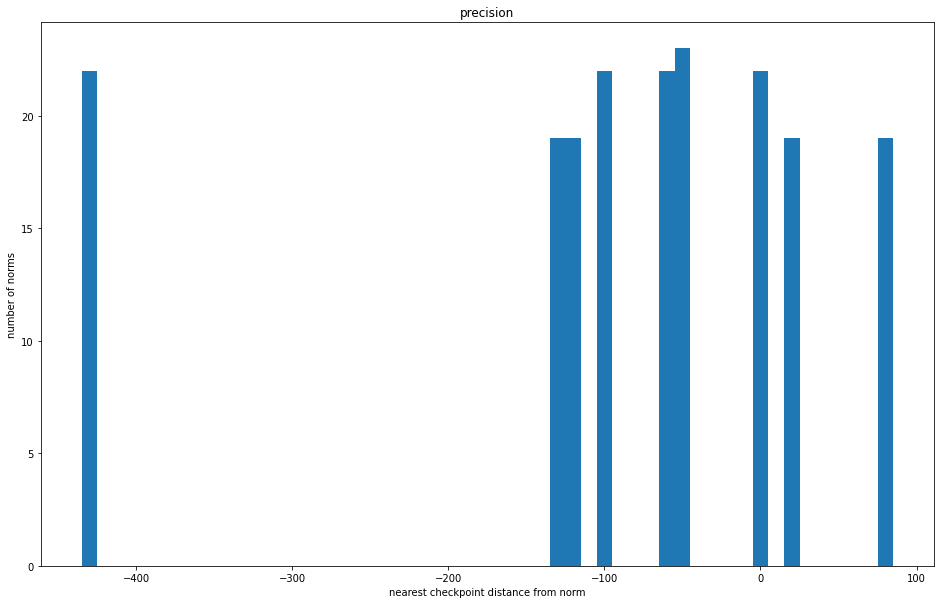

204


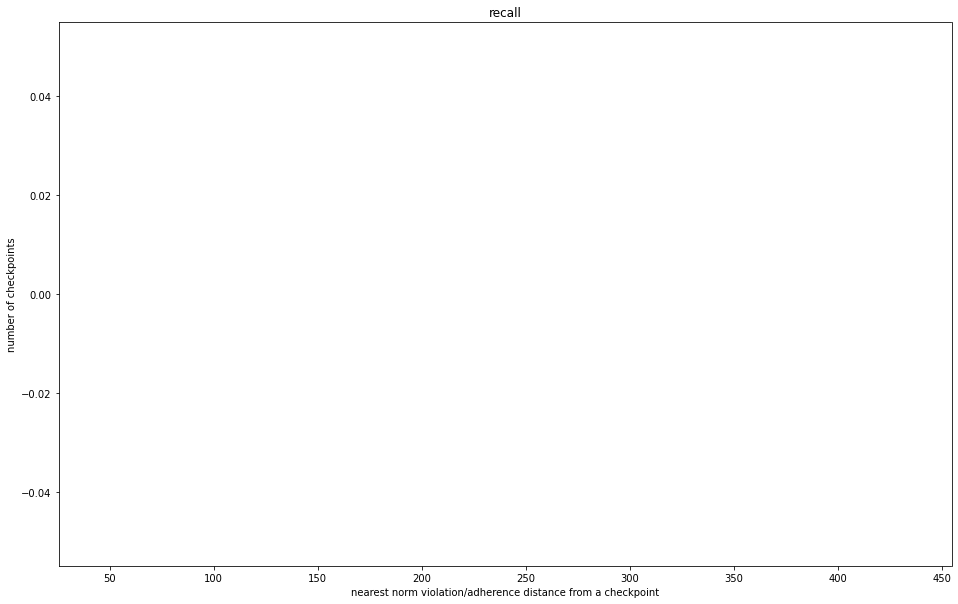

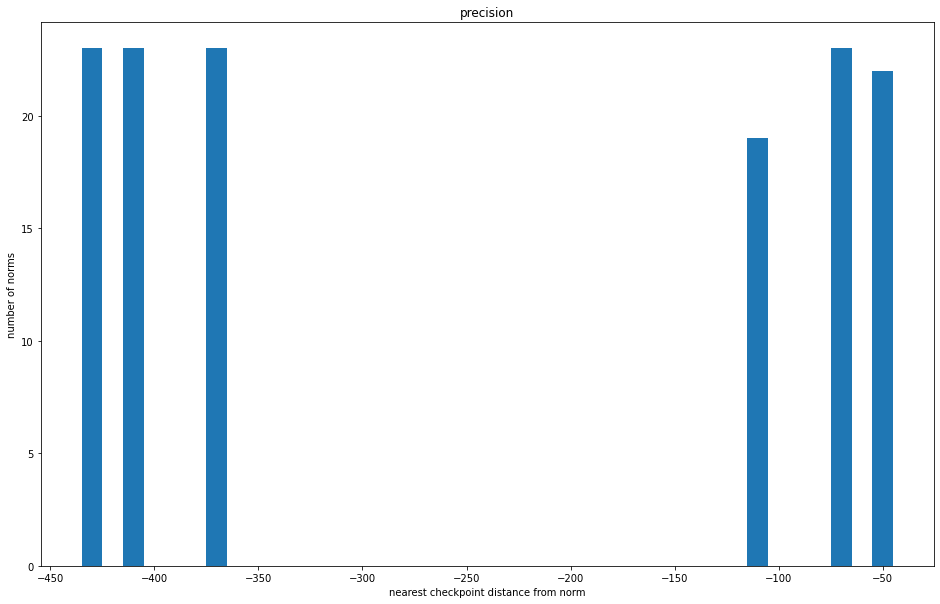

274


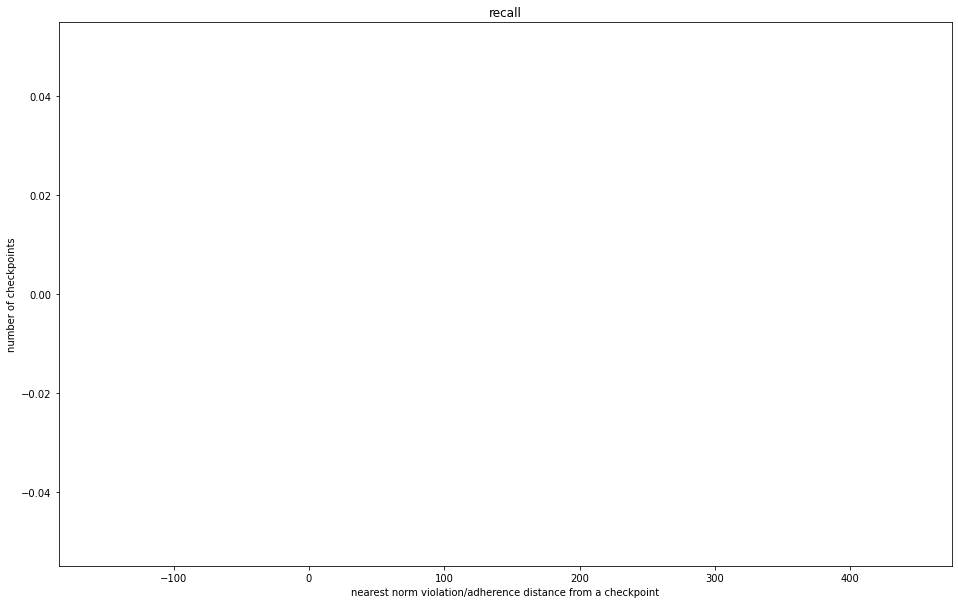

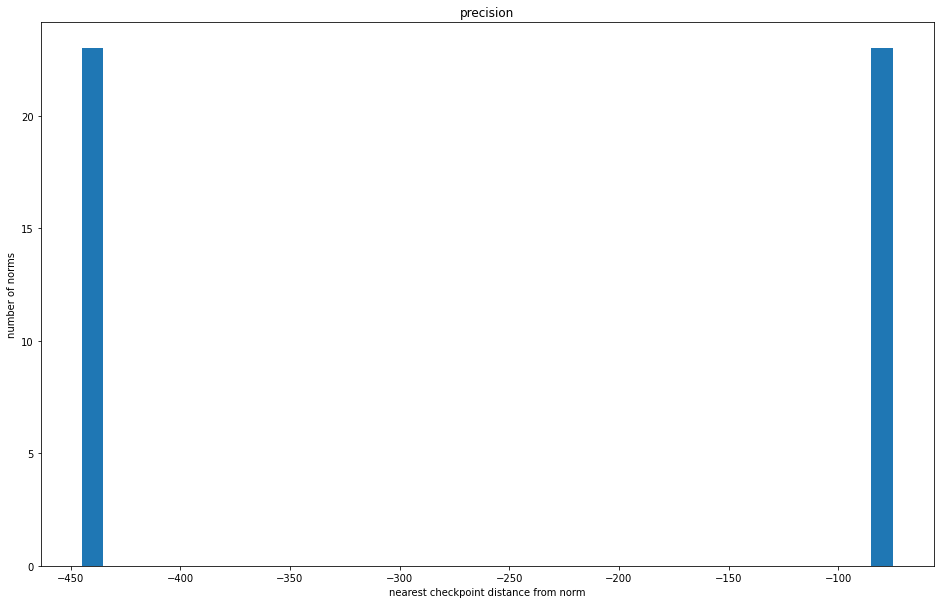

491


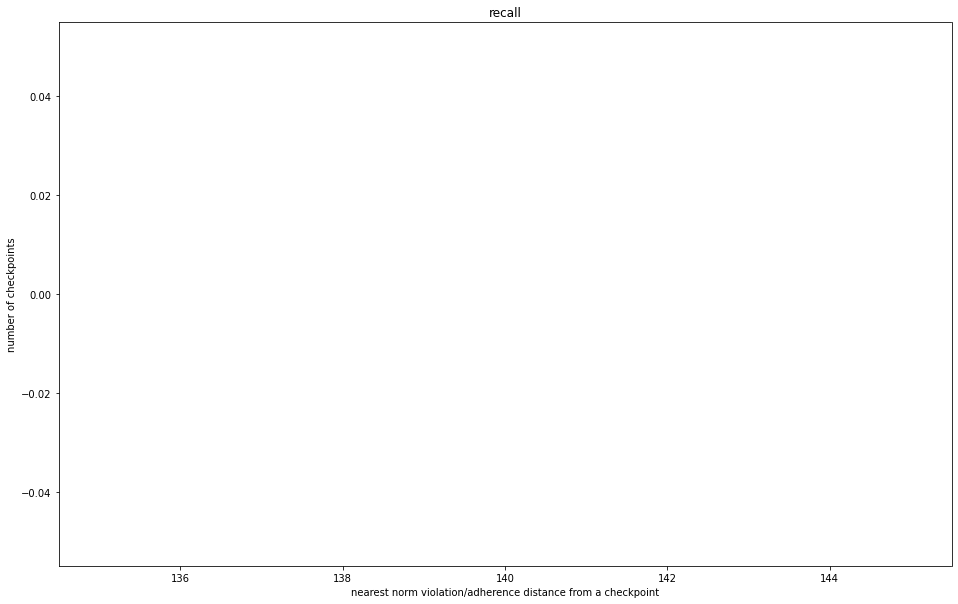

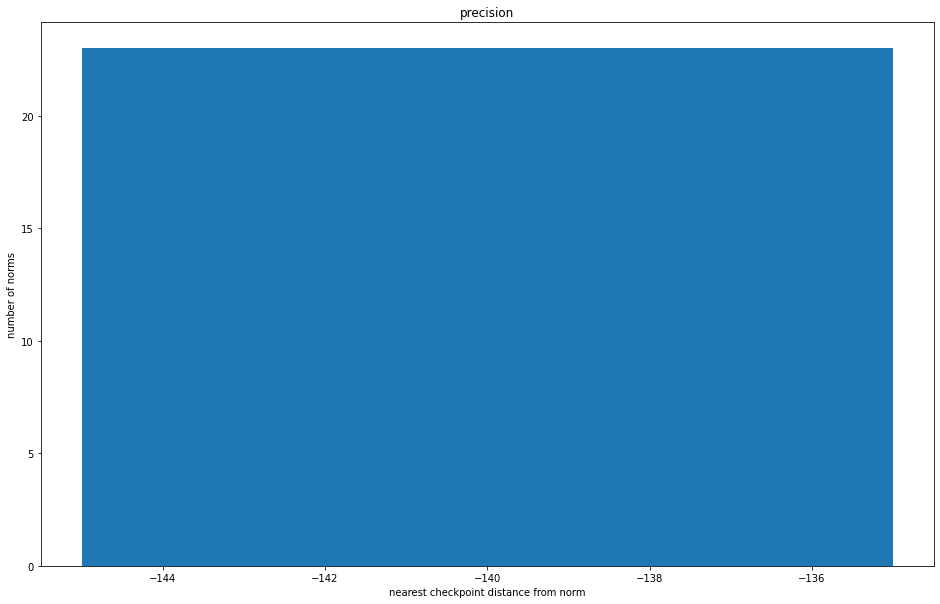

226


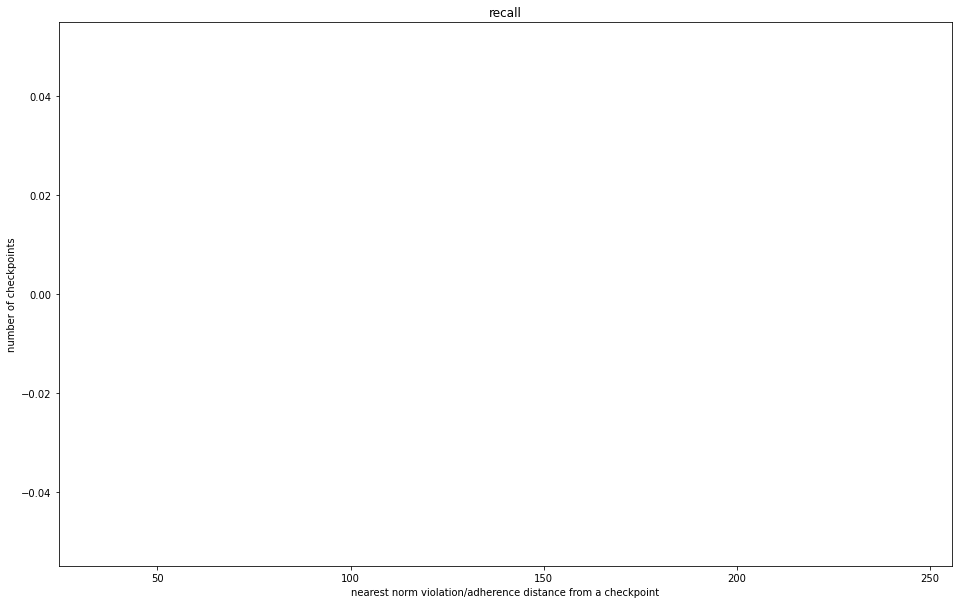

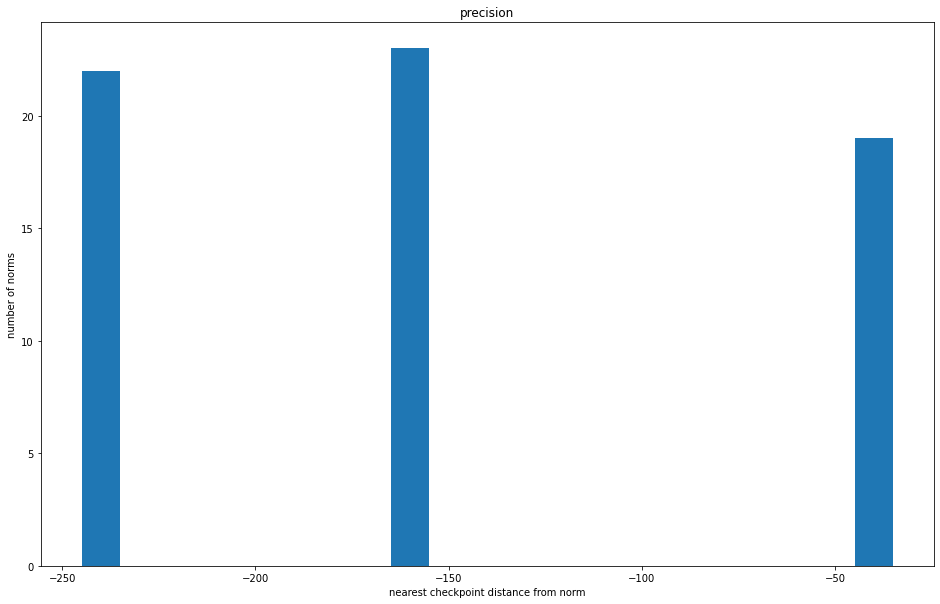

492


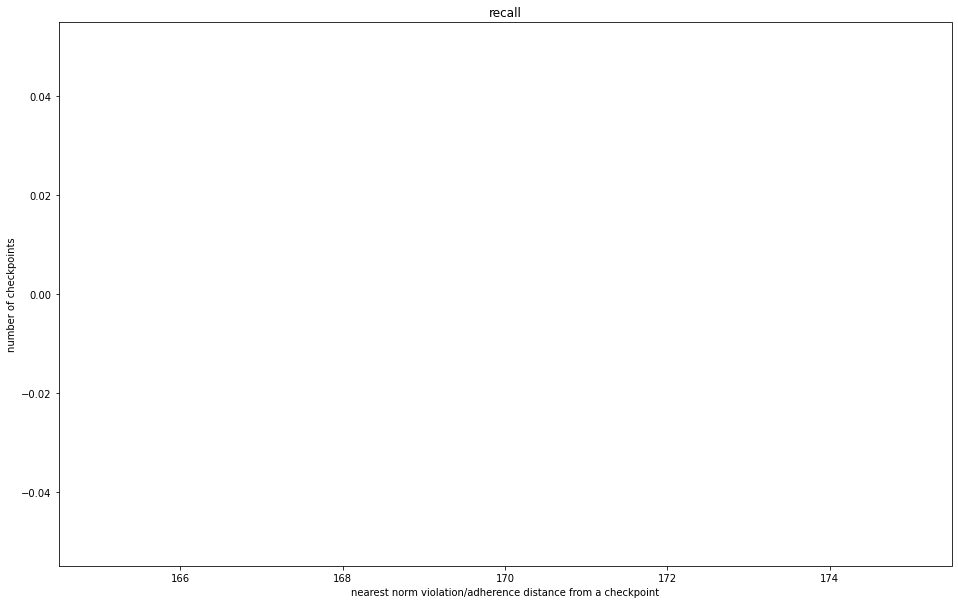

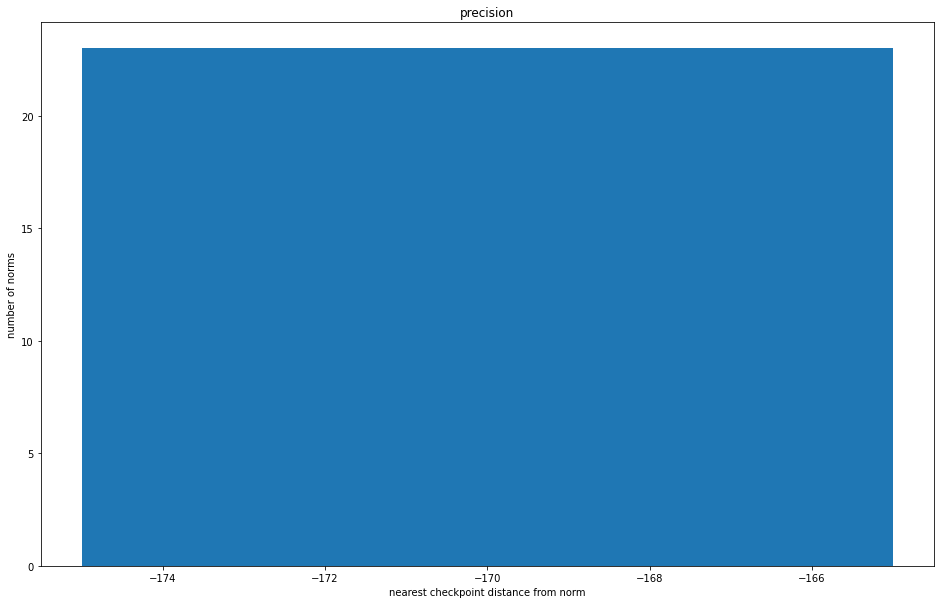

493


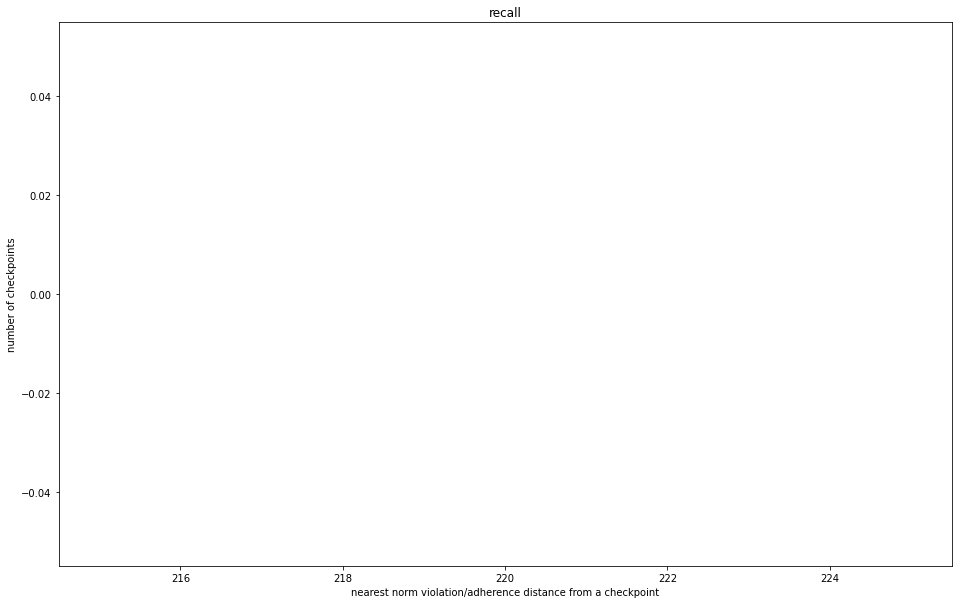

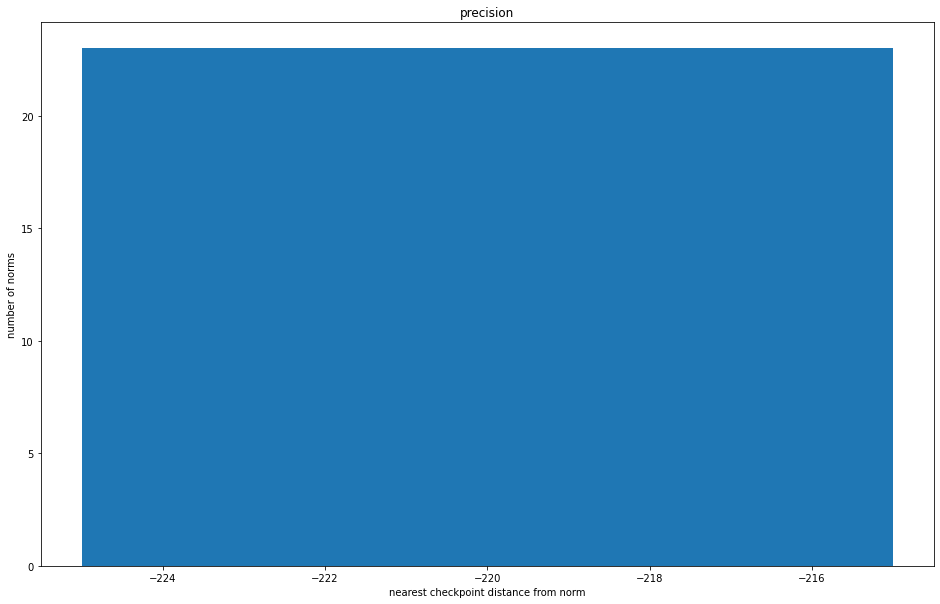

239


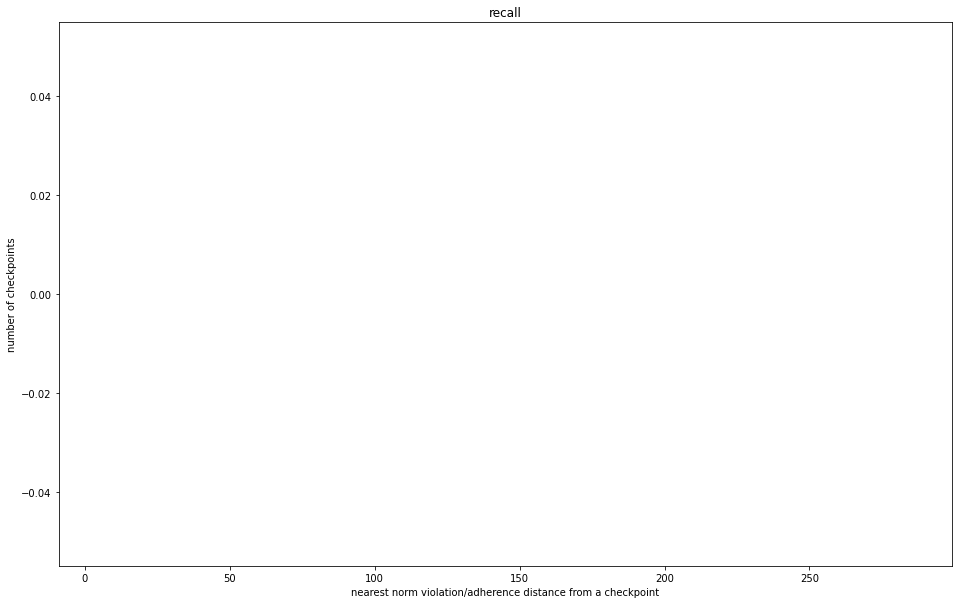

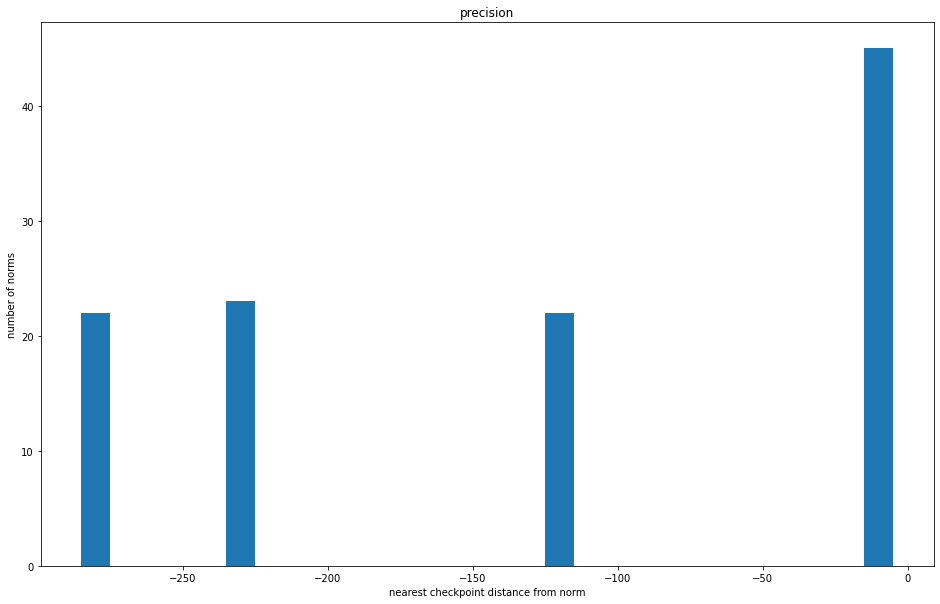

429


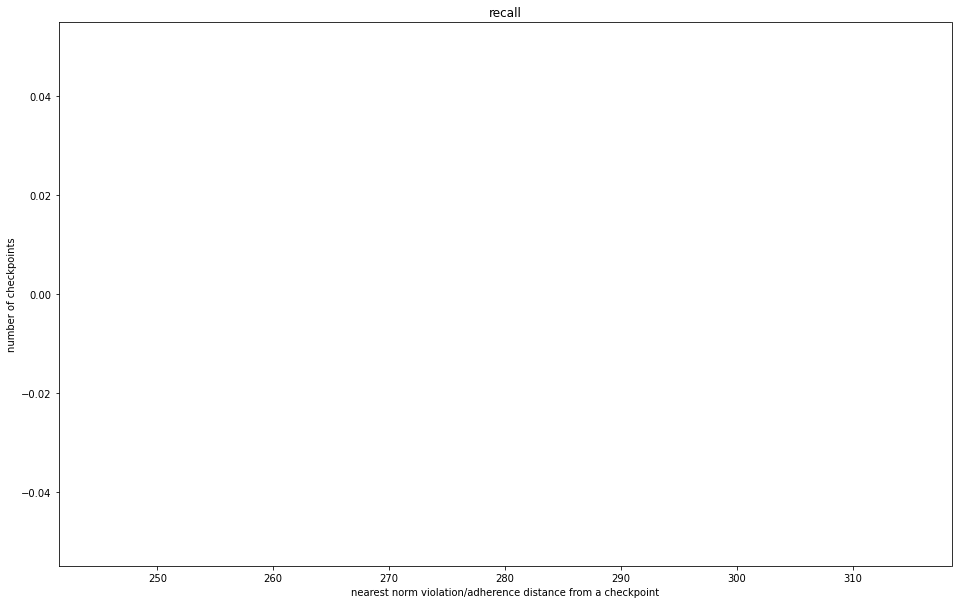

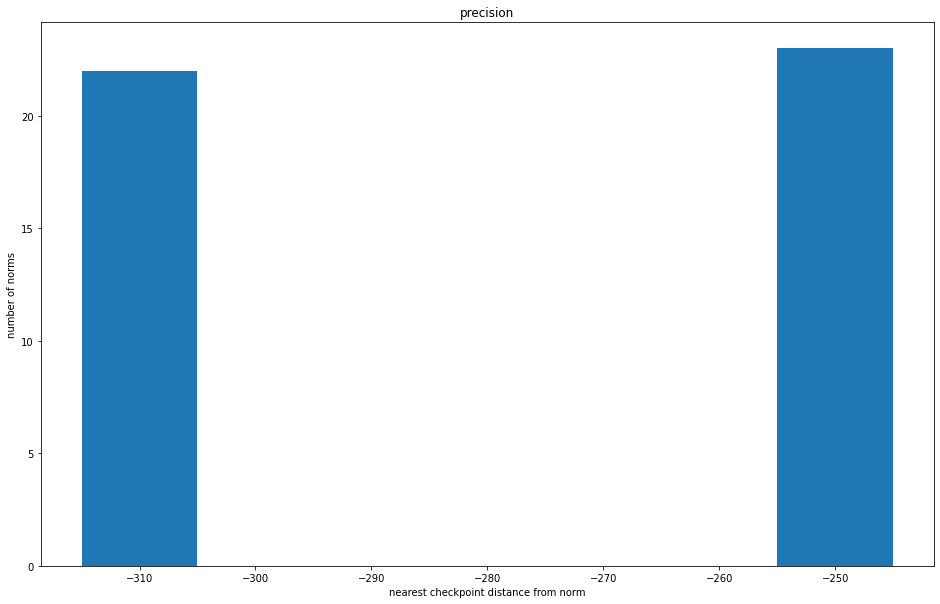

494


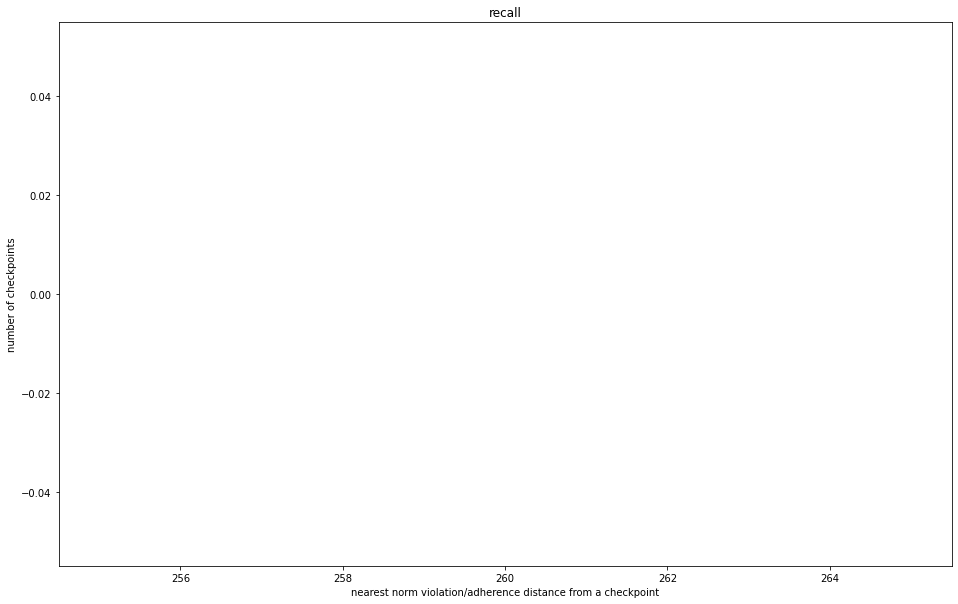

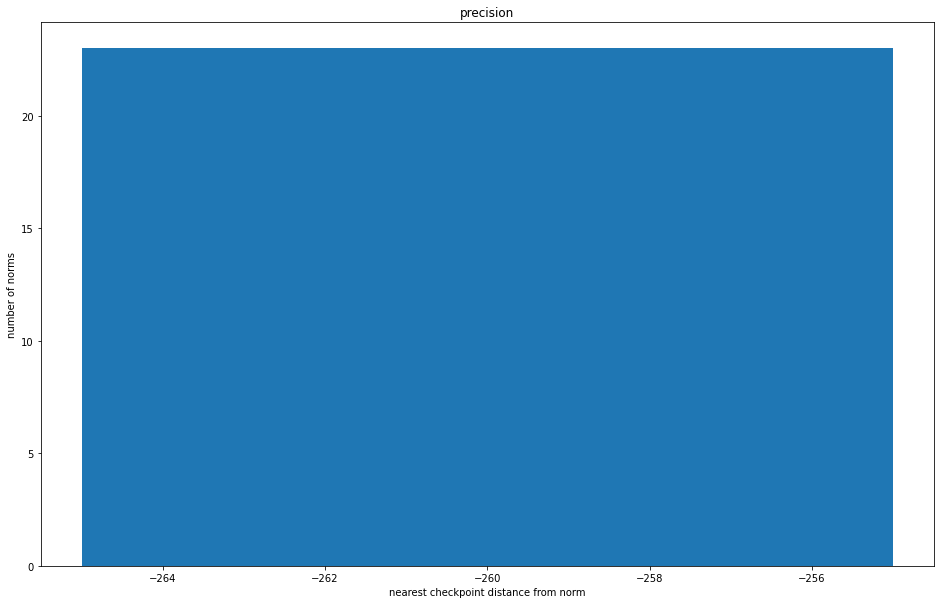

495


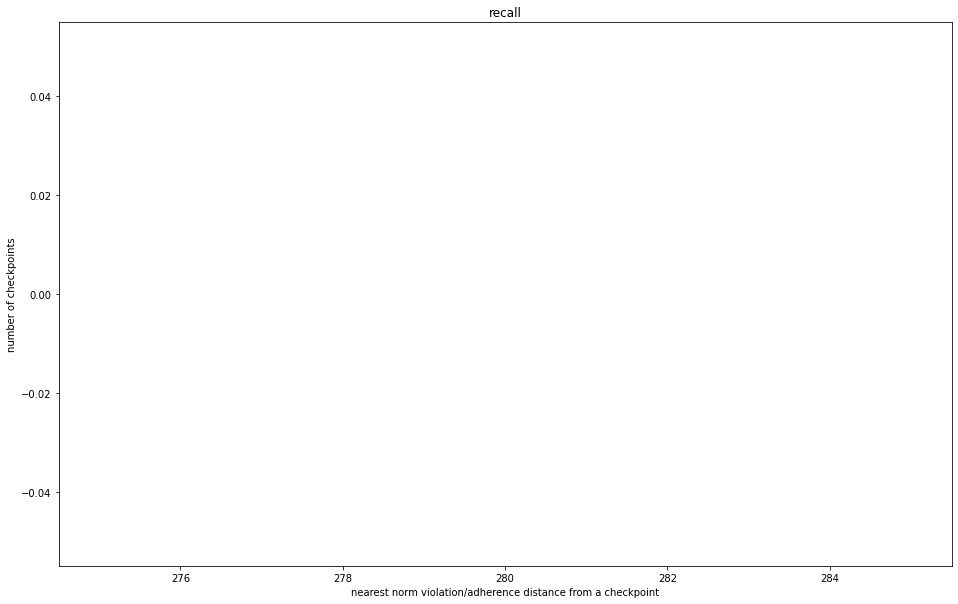

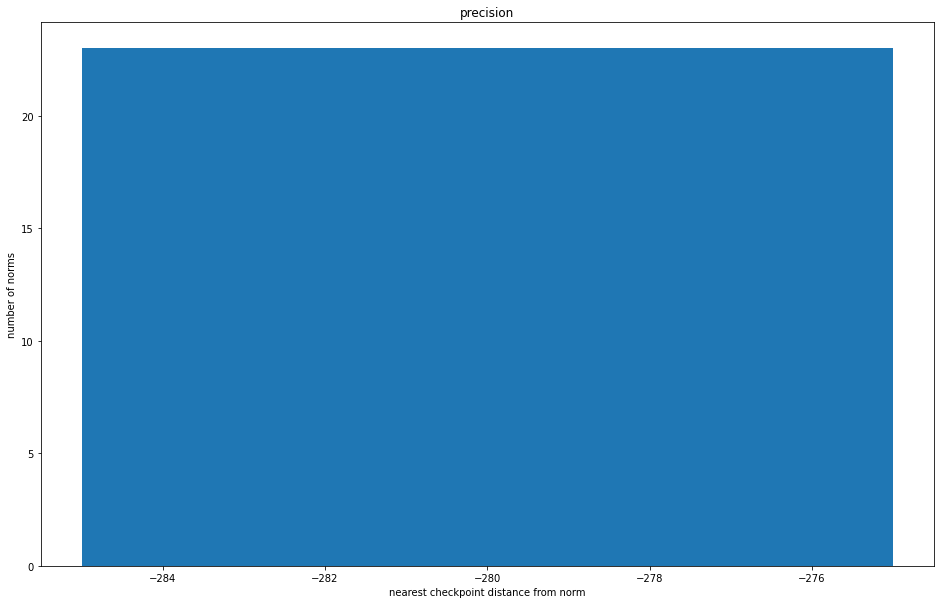

496


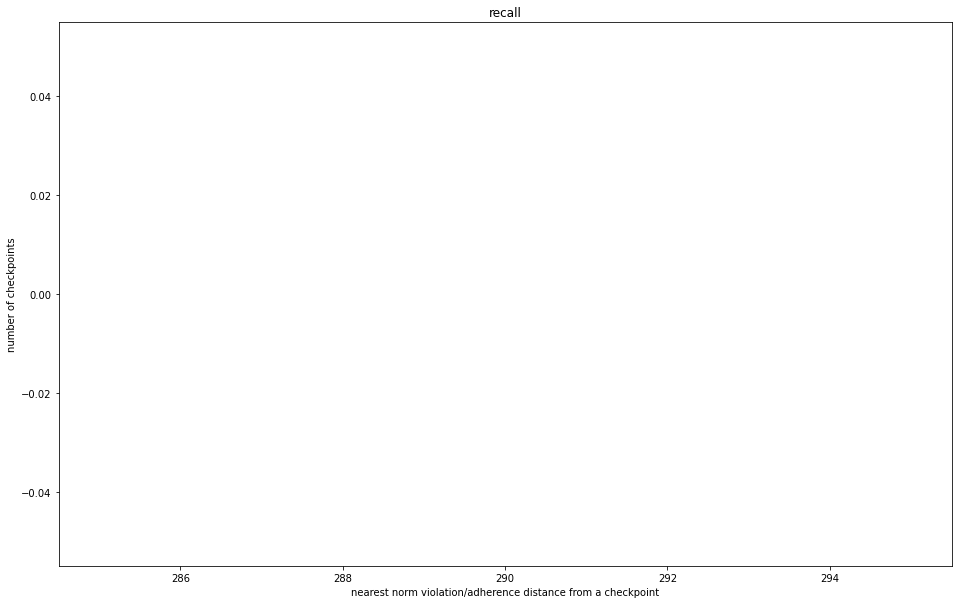

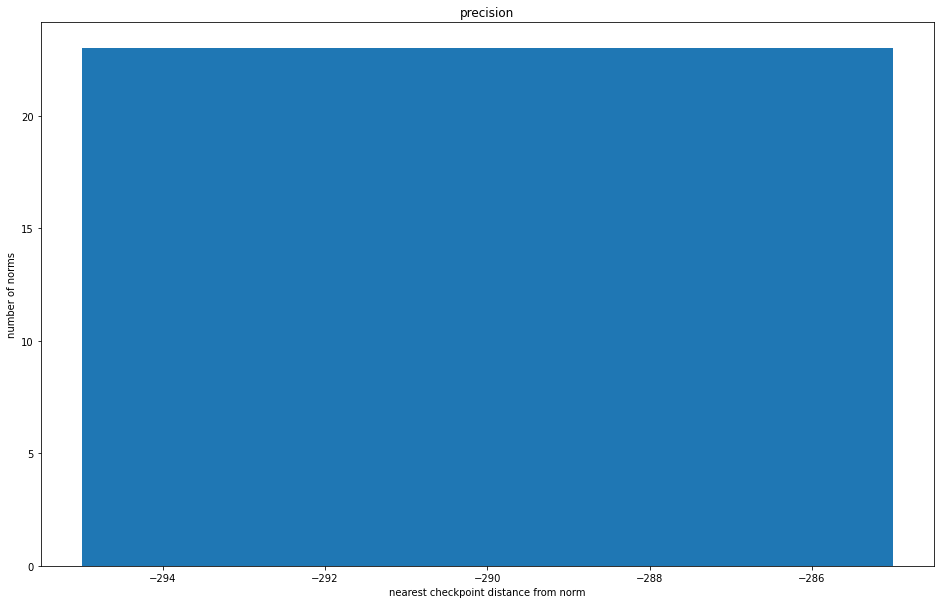

497


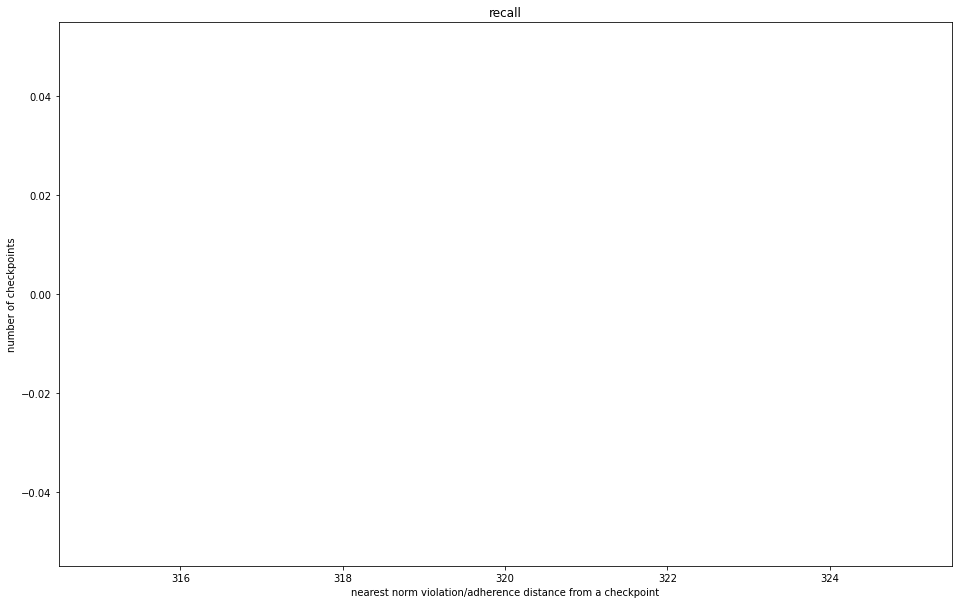

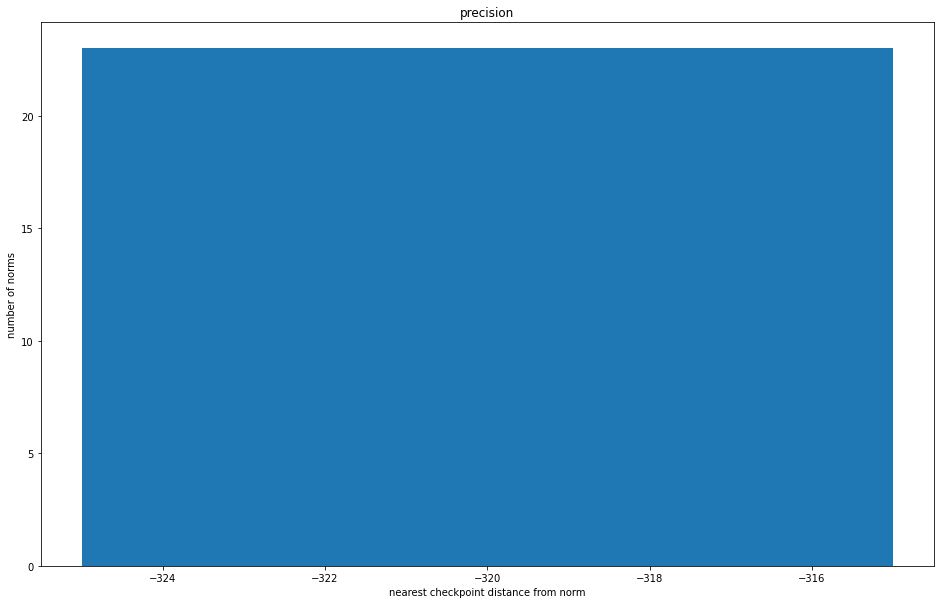

498


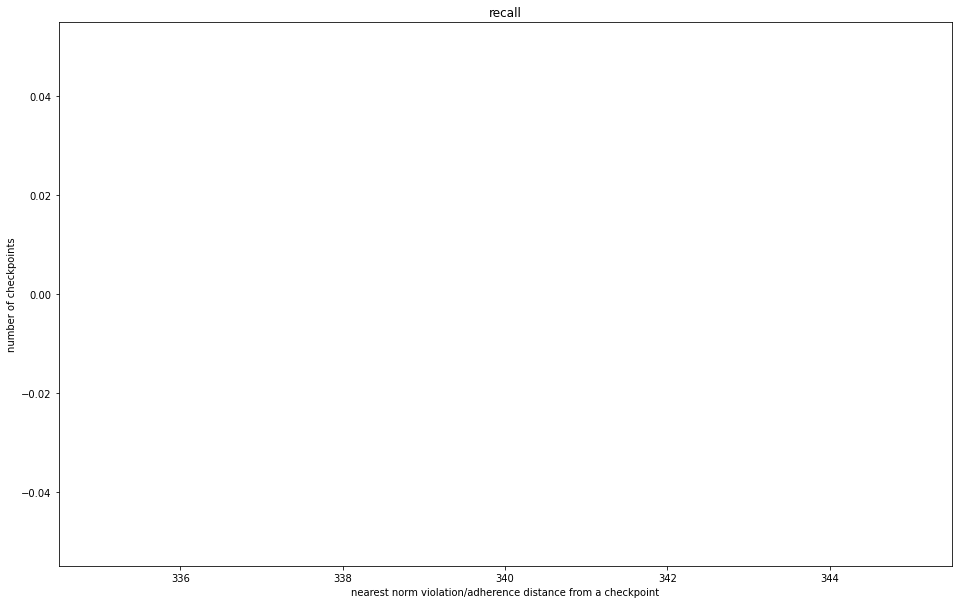

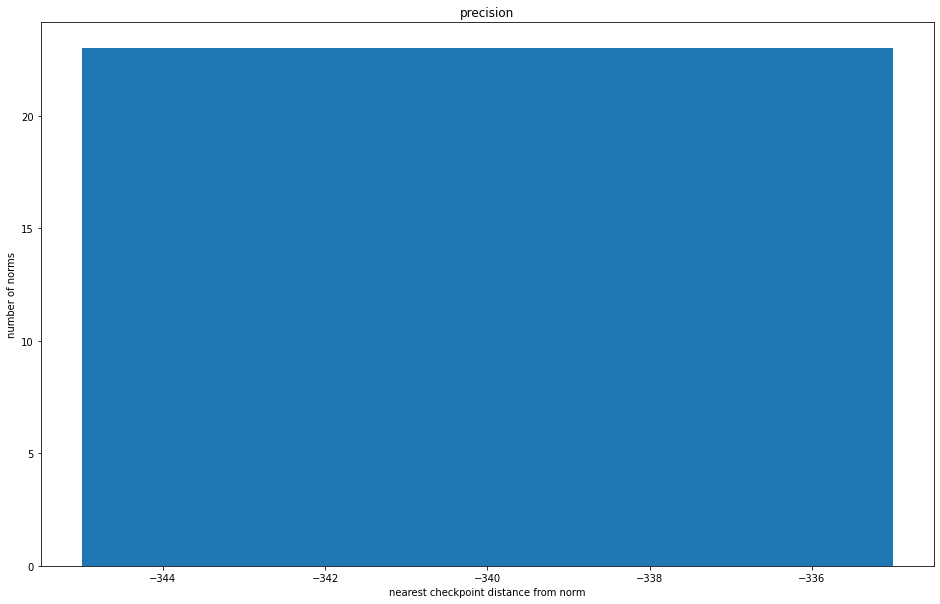

499


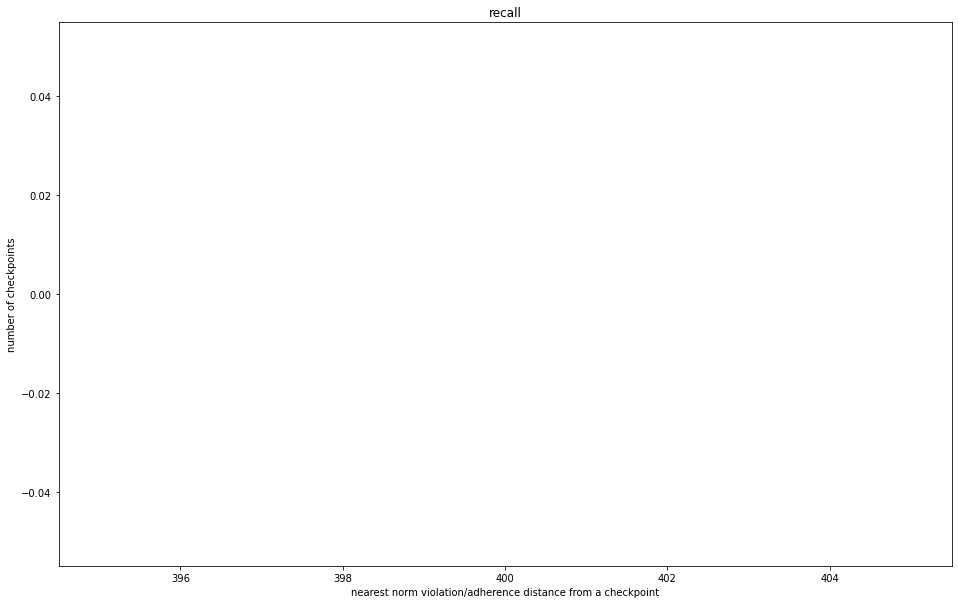

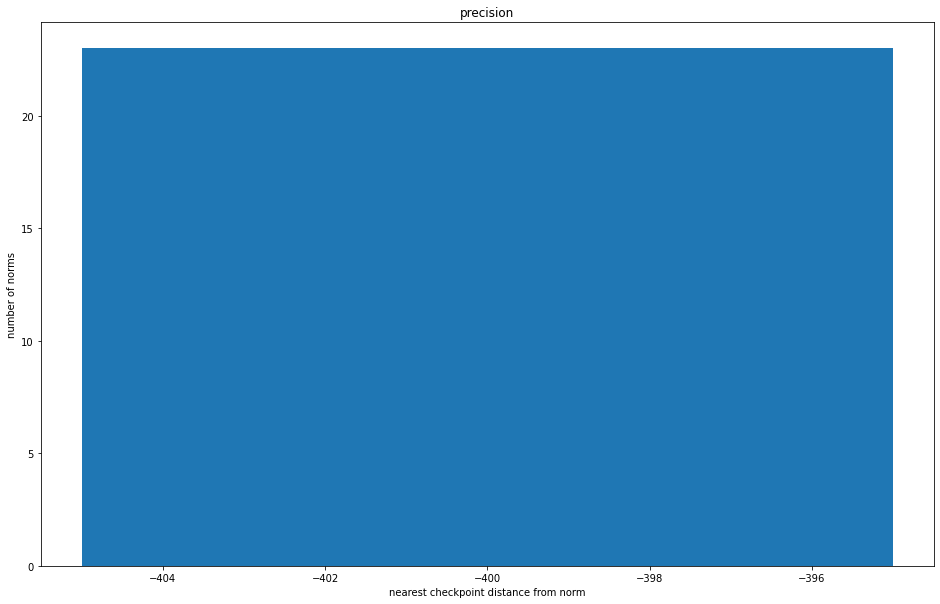

205


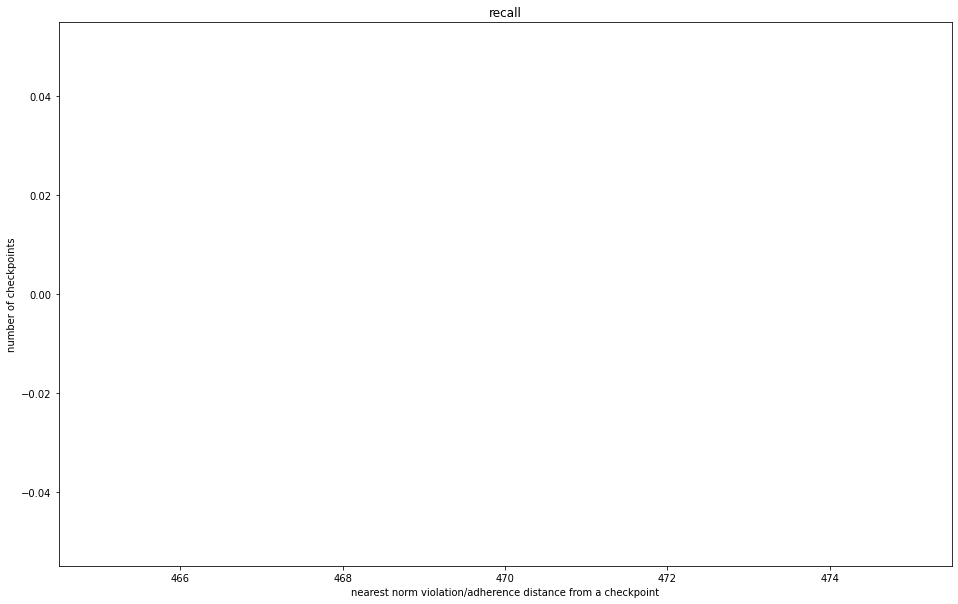

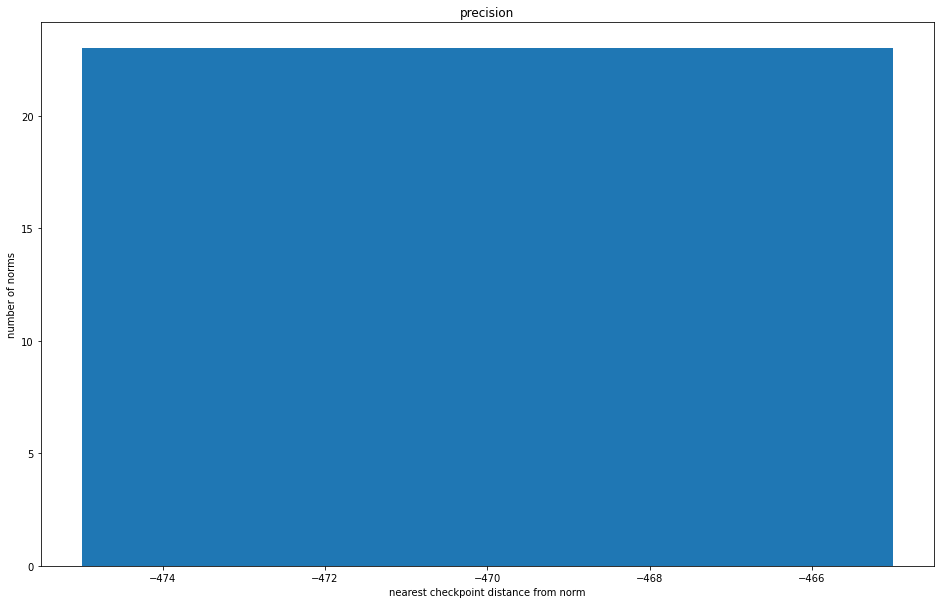

218


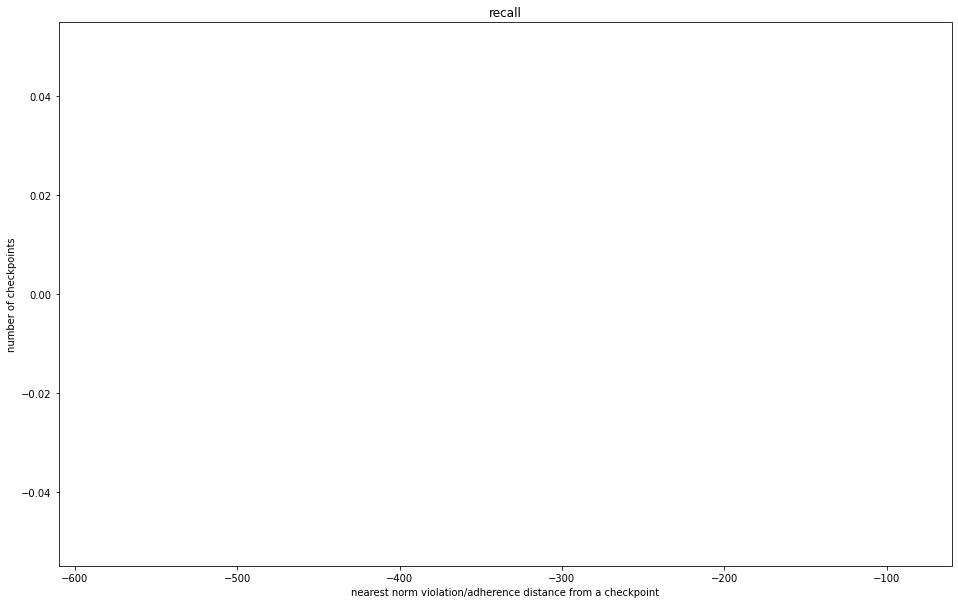

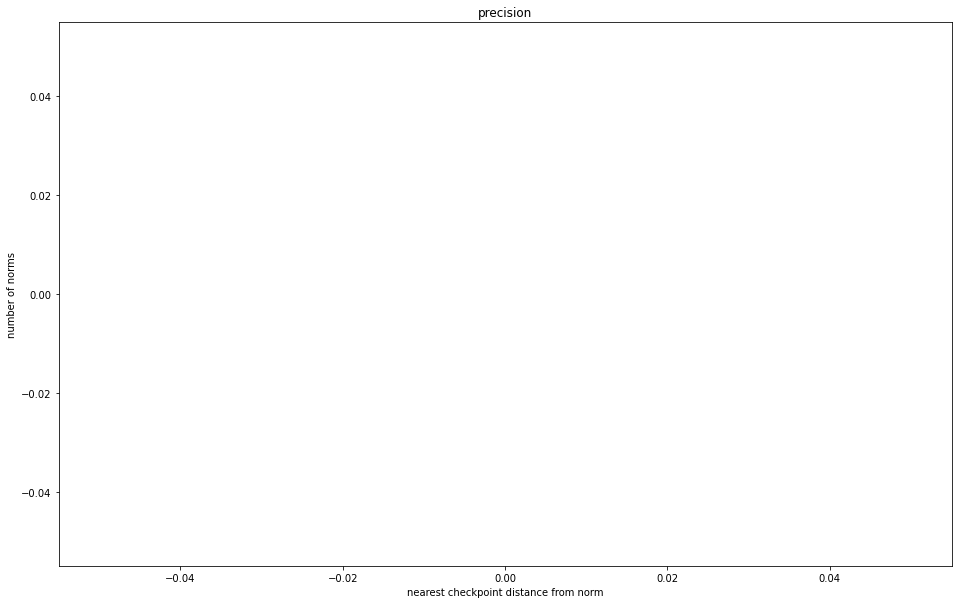

1635


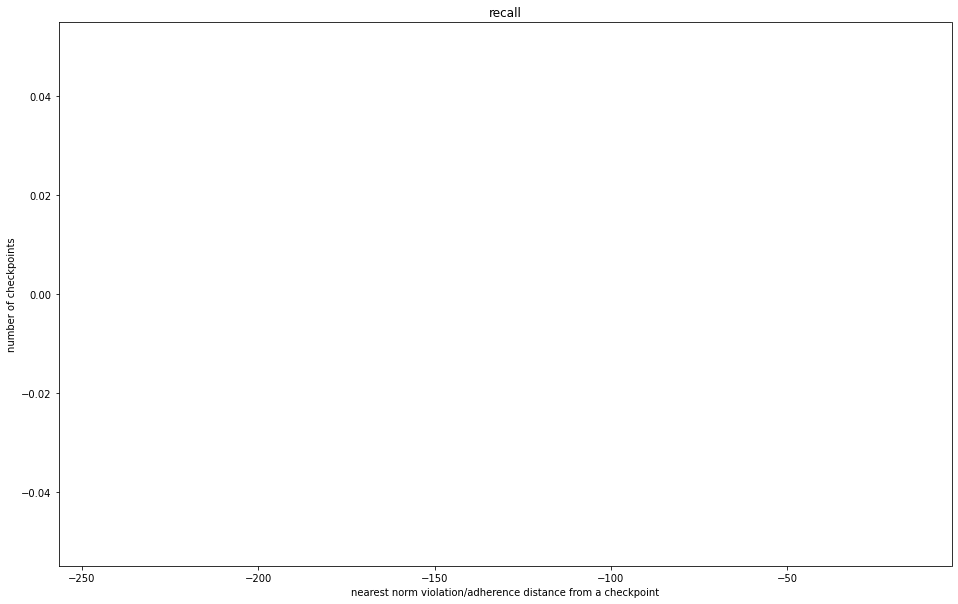

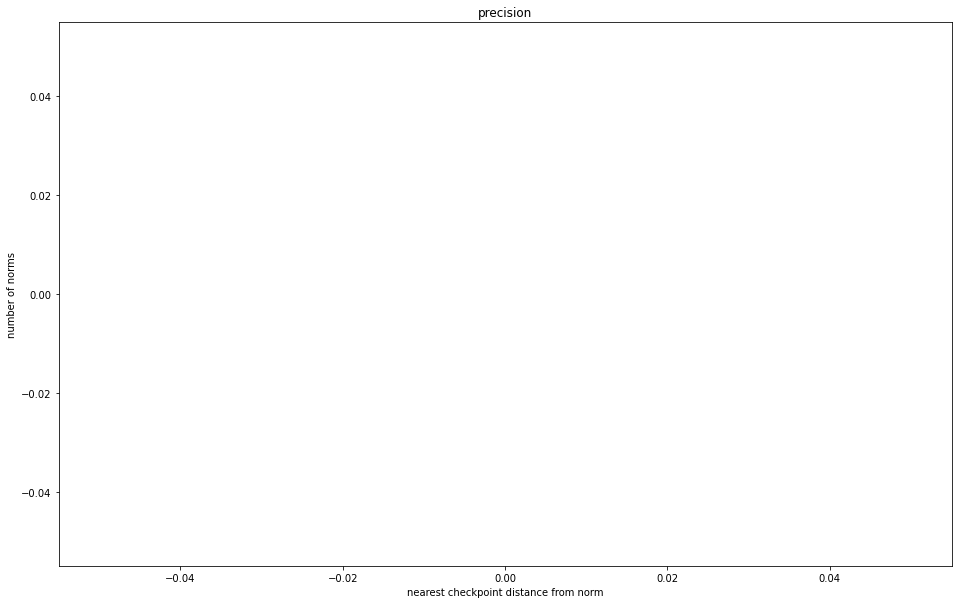

In [ ]:
for norm_type in norm_types:
  
  
  
  norms = {}
  for filename in filemine:
    normsf = pd.read_csv(filename, sep='\t', lineterminator='\n')
    df = normsf.reset_index()  
    for index, row in df.iterrows():
      if(row['norm']==norm_type):
        if row['file_id'] not in norms:
          norms[row['file_id']] = [[row['start'],row['end']]]
        else:
          norms[row['file_id']].append([row['start'],row['end']])


  dic ={}
  for key in change:
    for change_time in change[key]:
      if key in norms:
        mini=1000
        for seg in norms[key]:
          val = seg[0]-change_time
          end = seg[1]-change_time
          if abs(end)<abs(val):
            val=end
          if abs(val)<abs(mini):
            mini=val
        p =int(math.floor(val/10)*10)
        if p in dic:
          dic[p]+=1
        else:
          dic[p]=0
  print(norm_type)
  x=list(dic.keys())
  fig,ax = plt.subplots(figsize=(16,10))
  ax.bar(x,list(dic.values()),width=10)
  plt.title('recall')
  plt.xlabel("nearest norm violation/adherence distance from a checkpoint")
  plt.ylabel("number of checkpoints")
  plt.show()


  dic={}
    
  for key in norms:
    full=[]
    dist=[]
    ba=[]
    for nm in norms[key]:
      a=nm[0]
      b=nm[1]
      mid=(a+b)/2
      full.append((mid,b-mid,'n'))
    if key in change:
      for cp in change[key]:
        full.append((cp,'c'))
    full.sort(key=lambda a: a[0])
    cp = -1
    for  item in full:
      if(len(item)==2):
        cp=item[0]
      else:
        if cp==-1:
          dist.append(-1)
          ba.append('b')
        elif(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
          dist.append(0)
          ba.append('b')
        else:
          dist.append(abs(item[0]-item[1]-cp))
          ba.append('b')

    cp = -1
    i=len(dist)
    for item in full[::-1]:
      if(len(item)==2):
        cp=item[0]
      else:
        i-=1
        if cp!=-1:
          if(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
            dist[i]=0
          else:
            dist[i]=min(dist[i],abs(cp-item[0]-item[1]))
            ba[i]='a'
        

    for i in range(0,len(dist)):
      val=dist[i]
      if val!=-1:
        p =int(math.floor(val/10)*10)
        if ba[i]=='b':
          p=-p
        if p in dic:
          dic[p]+=1
        else:
          dic[p]=0

  x=list(dic.keys())
  fig,ax = plt.subplots(figsize=(16,10))
  ax.bar(x,list(dic.values()),width=10)
  plt.xlabel("nearest checkpoint distance from norm")
  plt.ylabel("number of norms")
  plt.title("precision")
  plt.show()










[(7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (7.035, 7.035, 'n'), (82.175, 7.185000000000002, 'n'), (82.175, 7.185000000000002, 'n'), (82.175, 7.185000000000002, 'n'), (82.175, 7.185000000000002, 'n'), (82.175, 7.185000000000002, 'n'), (82.175, 7.185000000000002, 'n'), (82.175, 7.185000000000002, 'n'), (82.175, 7.185000000000002, 'n'), (82.175, 7.185000000000002, 'n'), (82.175, 7.185000000000002, 'n'), (82.175, 7.185000000000002, 'n'), (82.175, 7.185000000000002, 'n'), (82.175, 7.185000000000002, 'n'), (82.175, 7.185000000000002, 'n'), (82.175, 7.18500000

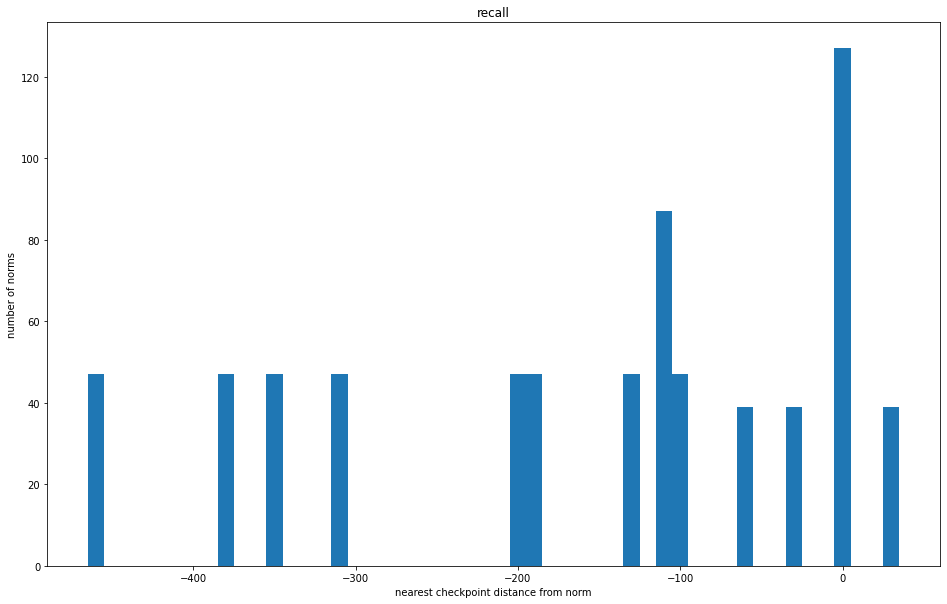

In [24]:
import math
for key in norms:
    full=[]
    dist=[]
    ba=[]
    for nm in norms[key]:
      a=nm[0]
      b=nm[1]
      mid=(a+b)/2
      full.append((mid,b-mid,'n'))
    if key in change:
      for cp in change[key]:
        full.append((cp,'c'))

    full.sort(key=lambda a: a[0])
    print(full)
    cp = -1
    for  item in full:
      if(len(item)==2):
        cp=item[0]
      else:
        if cp==-1:
          dist.append(-1)
          ba.append('b')
        elif(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
          dist.append(0)
          ba.append('b')
        else:
          dist.append(abs(item[0]-item[1]-cp))
          ba.append('b')

    cp = -1
    i=len(dist)
    for item in full[::-1]:
      if(len(item)==2):
        cp=item[0]
      else:
        i-=1
        if cp!=-1:
          if(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
            dist[i]=0
          else:
            dist[i]=min(dist[i],abs(cp-item[0]-item[1]))
            ba[i]='a'
        

    for i in range(0,len(dist)):
      val=dist[i]
      if val!=-1:
        p =int(math.floor(val/10)*10)
        if ba[i]=='b':
          p=-p
        if p in dic:
          dic[p]+=1
        else:
          dic[p]=0

x=list(dic.keys())
fig,ax = plt.subplots(figsize=(16,10))
ax.bar(x,list(dic.values()),width=10)
plt.xlabel("nearest checkpoint distance from norm")
plt.ylabel("number of norms")
plt.title("recall")
plt.show()
 

In [17]:
print(change)

{}
